# House Price Prediction

# Importing necessary packages

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
import re
from geopy.geocoders import Nominatim
from selenium.webdriver.chrome.options import Options
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import pickle
from sklearn.metrics import r2_score


# Function to retrieve full address from google map

In [6]:
def geomap(x):
#for i in range(0,10):
    search_string = x
    
    try:
        location = geolocator.geocode(search_string)
        fadd=location[0]
        return fadd
    except Exception :
        return('No Address Found')

In [58]:
def google_map_postal_code(x):
    search_string = x
    driver.get(map_url)
    time.sleep(2)
    driver.find_element(By.XPATH,'//*[@id="searchboxinput"]').send_keys(search_string)
    time.sleep(1)
    driver.find_element(By.XPATH,'//*[@id="searchbox-searchbutton"]').click()
    time.sleep(3)
    try:
        try:
            Full_address=driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[10]/div/div[1]').text
            return(Full_address)
        except Exception :
            try:
                time.sleep(2)
                driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div[3]').click()

                time.sleep(2)
                Full_address=driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[10]/div/div[1]').text

                return(Full_address)
            except Exception :
                return('No Address Found')
    except TimeoutException as ex:
        print(ex.Message)
        driver.navigate().refresh()
    
 

# Retrieving the data from property.ca website

In [19]:
driver = webdriver.Chrome()
driver.maximize_window()

In [20]:
url="https://property.ca/canada/houses-for-sale?home_type=House"

In [21]:
driver.get(url)
time.sleep(5)

In [22]:
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "#root > div > header > nav > div > div:nth-child(2) > div > nav > ul > li.styles___LogInOutContainer-sc-8m46ac-12.ljqaS > div > div > button:nth-child(1)"))).click()

In [23]:
username=driver.find_element(By.ID, 'email')
password=driver.find_element(By.ID, 'password')
username.send_keys("<email id>");
password.send_keys("<password>");
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "body > div.styles___Modal-sc-1l4jmki-2.styles___LoginModal-sc-1l4jmki-8.feBqAy.eQttSS.login > div > div > div.styles___LoginModal-sc-d3p3gj-0.letQMI > div > div > div > button"))).click()

In [ ]:
j= 2
properties =[]
while j < 560:
    housedetails = driver.find_elements(By.XPATH, "//*[@id='listRow']/div")
    driver.implicitly_wait(3) 
    for i in range(1,len(housedetails)):
        house = {}
        try:
    #if housedetails[i].find_elements_by_xpath(f'//*[@id="listRow"]/div[{i}]/div/a'):
            price= housedetails[i].find_element_by_xpath(f'//*[@id="listRow"]/div[{i}]/div[1]/a/div[2]/div[1]/div[1]').text
            address=housedetails[i].find_element_by_xpath(f'//*[@id="listRow"]/div[{i}]/div[1]/a/div[2]/div[2]/div/address').text
            specifics=housedetails[i].find_element_by_xpath(f'//*[@id="listRow"]/div[{i}]/div[1]/a/div[2]/div[3]').text
            house['Price'] = price
            house['Address'] = address
            house['Specifics'] = specifics
            properties.append(house)
            
        except NoSuchElementException:
            print(i)
    #driver.find_element(By.XPATH,f'//*[@id="heap-Search-Sale"]/div[1]/div/div[1]/div/div[3]/div/div[3]/div/div/div[1]/div/div[2]/ul/li[{j+1}]/a').click()
    #WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, f'//*[@id="heap-Search-Sale"]/div[1]/div/div[1]/div/div[3]/div/div[3]/div/div/div[1]/div/div[2]/ul/li[{j+1}]/a')).click();
    #WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, f'//*[@id="heap-Search-Sale"]/div[1]/div/div[1]/div/div[3]/div/div[3]/div/div/div[1]/div/div[2]/ul/li[{j+1}]/a'))).click()
    newUrl = f"https://property.ca/canada/houses-for-sale?home_type=House&page={j}";
    driver.get(newUrl)
    time.sleep(5)
    j+=1


In [25]:
len(properties)

26226

In [26]:
properties

[{'Address': '2020 Maple Blvd',
  'Price': '$769,000',
  'Specifics': '3+1BD1BA6 Parking700-1,100 sqft'},
 {'Address': '203 Marshall Ave',
  'Price': '$895,000',
  'Specifics': '2+1BD2BA7 Parking'},
 {'Address': '6806 Cherrygrove Rd',
  'Price': '$669,900',
  'Specifics': '3+1BD2BA5 Parking1,100-1,500 sqft'},
 {'Address': '3329 David Milne Way',
  'Price': '$1,050,000',
  'Specifics': '4BD3BA4 Parking2,000-2,500 sqft'},
 {'Address': '130 Citation Dr',
  'Price': '$4,888,000',
  'Specifics': '5+1BD8BA4 Parking+5,000 sqft'},
 {'Address': '20 Bannister St',
  'Price': '$699,999',
  'Specifics': '3BD3BA3 Parking'},
 {'Address': '524 Forsyth Farm Dr',
  'Price': '$1,599,000',
  'Specifics': '4BD5BA4 Parking2,500-3,000 sqft'},
 {'Address': '182 Radford Dr',
  'Price': '$689,999',
  'Specifics': '3BD2BA3 Parking1,100-1,500 sqft'},
 {'Address': '16 Derby Gate Cres',
  'Price': '$475,000',
  'Specifics': '3BD2BA3 Parking'},
 {'Address': '18 Ravenhill Cres',
  'Price': '$3,438,000',
  'Specifics

# Converting the data to dataframe and storing the records locally

In [ ]:
df_properties=pd.DataFrame(properties)

In [28]:
df_properties.head(20)

Price                 Address                          Specifics
0     $769,000         2020 Maple Blvd    3+1BD1BA6 Parking700-1,100 sqft
1     $895,000        203 Marshall Ave                  2+1BD2BA7 Parking
2     $669,900     6806 Cherrygrove Rd  3+1BD2BA5 Parking1,100-1,500 sqft
3   $1,050,000    3329 David Milne Way    4BD3BA4 Parking2,000-2,500 sqft
4   $4,888,000         130 Citation Dr       5+1BD8BA4 Parking+5,000 sqft
5     $699,999         20 Bannister St                    3BD3BA3 Parking
6   $1,599,000     524 Forsyth Farm Dr    4BD5BA4 Parking2,500-3,000 sqft
7     $689,999          182 Radford Dr    3BD2BA3 Parking1,100-1,500 sqft
8     $475,000      16 Derby Gate Cres                    3BD2BA3 Parking
9   $3,438,000       18 Ravenhill Cres                 4+2BD6BA15 Parking
10    $999,000     1786 Westbridge Way  3+1BD4BA4 Parking1,500-2,000 sqft
11  $1,875,000    1718 Old Second Rd S                   3BD2BA13 Parking
12    $650,000       1030 Sunnidale Rd    3BD2BA8 Parking1,100-1,500 sqft
13  $1,699,000      19 Stoneheath Cres  4+1BD4BA6 Parking2,500-3,000 sqft
14    $820,000       18 Birchfield Crt  3+1BD3BA5 Parking1,500-2,000 sqft
15    $939,000           17 Lewin Cres                  3+1BD2BA3 Parking
16    $994,900     18 ASHWOOD Crescent          3BD3BA2 Parking1,121 sqft
17  $1,286,000     12 AUTUMN LEAF Road          4BD4BA1 Parking1,500 sqft
18  $1,299,900  731 Runningbrook Drive          5BD3BA2 Parking1,563 sqft
19    $829,900      458 ELMWOOD Avenue            2BD2BA0 Parking848 sqft

In [ ]:
df_properties.to_csv('Properties.csv')

# Reading the CSV file stored int a dataframe

In [8]:
df_properties=pd.read_csv('Properties.csv')

In [9]:
df_properties.shape

(26226, 4)

In [10]:
df_properties.head()

Unnamed: 0       Price               Address  \
0           0    $769,000       2020 Maple Blvd   
1           1    $895,000      203 Marshall Ave   
2           2    $669,900   6806 Cherrygrove Rd   
3           3  $1,050,000  3329 David Milne Way   
4           4  $4,888,000       130 Citation Dr   

                           Specifics  
0    3+1BD1BA6 Parking700-1,100 sqft  
1                  2+1BD2BA7 Parking  
2  3+1BD2BA5 Parking1,100-1,500 sqft  
3    4BD3BA4 Parking2,000-2,500 sqft  
4       5+1BD8BA4 Parking+5,000 sqft

In [23]:
full_address=google_map_postal_code('130 Citation Dr')

In [24]:
full_address

'130 Citation Dr, North York, ON M2K 1T3'

# Getting the full address of the property

In [5]:
map_url = 'https://www.google.ca/maps/'
driver = webdriver.Chrome()
driver.maximize_window()
#System.setProperty("webdriver.chrome.silentOutput","true")
driver.get(map_url)
#time.sleep(2)


In [ ]:
df_properties['full_address'] = df_properties[['Address']].apply(google_map_postal_code, axis=1)

not found: Address    3329 David Milne Way
Name: 3, dtype: object
not found: Address    130 Citation Dr
Name: 4, dtype: object
not found: Address    20 Bannister St
Name: 5, dtype: object
not found: Address    524 Forsyth Farm Dr
Name: 6, dtype: object
not found: Address    182 Radford Dr
Name: 7, dtype: object
not found: Address    18 ASHWOOD Crescent
Name: 16, dtype: object
not found: Address    396 CHARLTON Avenue W
Name: 24, dtype: object
not found: Address    632 Ridge Road W
Name: 33, dtype: object
not found: Address    493 CHARLTON Avenue E
Name: 36, dtype: object
not found: Address    477 BRITANNIA Avenue
Name: 38, dtype: object
not found: Address    52 St.Paul St. West St
Name: 39, dtype: object
not found: Address    48 Santos Dr
Name: 49, dtype: object
not found: Address    4870 MCKEE PLACE
Name: 58, dtype: object
not found: Address    1929 8th Line Rd
Name: 66, dtype: object
not found: Address    18 Ashwood Cres
Name: 72, dtype: object
not found: Address    1728 DUNCAN DRIVE

In [6]:
df_properties1=df_properties[:5000]
df_properties2=df_properties[5000:10000]
df_properties3=df_properties[10000:15000]
df_properties4=df_properties[15000:20000]
df_properties5=df_properties[20000:]

In [7]:
print(df_properties1.shape)
print(df_properties2.shape)
print(df_properties3.shape)
print(df_properties4.shape)
print(df_properties5.shape)

(5000, 4)
(5000, 4)
(5000, 4)
(5000, 4)
(6226, 4)


In [8]:
df_properties1.reset_index(inplace = True)
df_properties2.reset_index(inplace = True)
df_properties3.reset_index(inplace = True)
df_properties4.reset_index(inplace = True)
df_properties5.reset_index(inplace = True)

In [33]:
df_prop1=df_properties1[['Price','Address','Specifics']]
df_prop2=df_properties2[['Price','Address','Specifics']]
df_prop3=df_properties3[['Price','Address','Specifics']]
df_prop4=df_properties4[['Price','Address','Specifics']]
df_prop5=df_properties5[['Price','Address','Specifics']]

In [38]:
df_prop1.head()

Price               Address                          Specifics
0    $769,000       2020 Maple Blvd    3+1BD1BA6 Parking700-1,100 sqft
1    $895,000      203 Marshall Ave                  2+1BD2BA7 Parking
2    $669,900   6806 Cherrygrove Rd  3+1BD2BA5 Parking1,100-1,500 sqft
3  $1,050,000  3329 David Milne Way    4BD3BA4 Parking2,000-2,500 sqft
4  $4,888,000       130 Citation Dr       5+1BD8BA4 Parking+5,000 sqft

In [39]:
df_prop2.head()

Price                 Address                          Specifics
0  $1,799,000  455 German School Road          4BD3BA8 Parking4,060 sqft
1    $829,000         91 Dumfries Ave  3+1BD3BA4 Parking1,500-2,000 sqft
2  $2,780,000            43 Birch Ave                    4BD3BA6 Parking
3  $1,525,000         478 Cedric Terr  4+1BD5BA4 Parking3,000-3,500 sqft
4    $749,900         77 Waverly St S                    3BD2BA3 Parking

In [40]:
df_prop3.head()

Price             Address                    Specifics
0  $1,199,999      58 Bellman Ave              3BD1BA3 Parking
1  $1,479,900  488B Mcroberts Ave              4BD4BA2 Parking
2  $1,115,000   612 Victoria St E              3BD1BA4 Parking
3  $1,670,000   110 Hawthorn Road  3+1BD1BA6 Parking2,535 sqft
4  $1,599,000  1179 Parkway Drive    3BD5BA7 Parking2,800 sqft

In [73]:
df_prop4.head()

Price                  Address                          Specifics
0    $749,900          54 Greening Ave  3+1BD2BA3 Parking1,100-1,500 sqft
1  $1,249,000         11906 100 AVENUE          3BD3BA7 Parking1,756 sqft
2  $1,699,000  5278 WESTMINSTER AVENUE          4BD5BA2 Parking2,437 sqft
3  $2,999,900         4440 Ritson Rd N                   4BD1BA10 Parking
4    $625,000         120 Glengarry Rd                    2BD2BA6 Parking

In [42]:
df_prop5.head()

Price                 Address                          Specifics
0    $899,900        275 Sunnidale Rd  3+1BD2BA6 Parking1,500-2,000 sqft
1  $4,688,000           3 Sagewood Dr  4+1BD5BA9 Parking3,500-5,000 sqft
2    $649,900  14 - 46000 THOMAS ROAD          2BD2BA4 Parking1,406 sqft
3  $6,998,000    2965 ROSEBERY AVENUE          4BD4BA6 Parking4,267 sqft
4    $833,000          10 Kelley Cres  3+2BD3BA8 Parking1,500-2,000 sqft

# Full Address from package geocoders

In [43]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [25]:
location = geolocator.geocode('455 German School Road')

In [26]:
location[0]

'455, German School Road, Richmond, Virginia, 23225, United States'

In [9]:
df_properties['Address'][1]

'203 Marshall Ave'

In [42]:
zip1=pd.DataFrame(full_address)

In [43]:
zip1.to_csv('full.csv')

In [34]:
full1_address=[]
full2_address=[]
full3_address=[]
full4_address=[]
full5_address=[]

In [74]:
df_prop1['full_address'] = df_prop1['Address'].map(lambda x: geomap(x))

C:\Users\devel\AppData\Local\Temp\ipykernel_18492\2167322418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop1['full_address'] = df_prop1['Address'].map(lambda x: geomap(x))


In [75]:
df_prop1.head()

Price               Address                          Specifics  \
0    $769,000       2020 Maple Blvd    3+1BD1BA6 Parking700-1,100 sqft   
1    $895,000      203 Marshall Ave                  2+1BD2BA7 Parking   
2    $669,900   6806 Cherrygrove Rd  3+1BD2BA5 Parking1,100-1,500 sqft   
3  $1,050,000  3329 David Milne Way    4BD3BA4 Parking2,000-2,500 sqft   
4  $4,888,000       130 Citation Dr       5+1BD8BA4 Parking+5,000 sqft   

                                        full_address  
0  2020, Maple Boulevard, Port Dover, Norfolk Cou...  
1  203, Marshall Avenue, Welland, Niagara Region,...  
2  6806, Cherrygrove Road, Niagara Falls, Niagara...  
3                                   No Address Found  
4  130, Citation Drive, Don Valley North, North Y...

In [76]:
df_prop2['full_address'] = df_prop2['Address'].map(lambda x: geomap(x))

C:\Users\devel\AppData\Local\Temp\ipykernel_18492\30926997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop2['full_address'] = df_prop2['Address'].map(lambda x: geomap(x))


In [77]:
df_prop3['full_address'] = df_prop3['Address'].map(lambda x: geomap(x))

C:\Users\devel\AppData\Local\Temp\ipykernel_18492\1484567435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop3['full_address'] = df_prop3['Address'].map(lambda x: geomap(x))


In [78]:
df_prop4['full_address'] = df_prop4['Address'].map(lambda x: geomap(x))

C:\Users\devel\AppData\Local\Temp\ipykernel_18492\2469154068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop4['full_address'] = df_prop4['Address'].map(lambda x: geomap(x))


In [79]:
df_prop5['full_address'] = df_prop5['Address'].map(lambda x: geomap(x))

C:\Users\devel\AppData\Local\Temp\ipykernel_18492\3215236284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop5['full_address'] = df_prop5['Address'].map(lambda x: geomap(x))


In [80]:
df_prop1.head()

Price               Address                          Specifics  \
0    $769,000       2020 Maple Blvd    3+1BD1BA6 Parking700-1,100 sqft   
1    $895,000      203 Marshall Ave                  2+1BD2BA7 Parking   
2    $669,900   6806 Cherrygrove Rd  3+1BD2BA5 Parking1,100-1,500 sqft   
3  $1,050,000  3329 David Milne Way    4BD3BA4 Parking2,000-2,500 sqft   
4  $4,888,000       130 Citation Dr       5+1BD8BA4 Parking+5,000 sqft   

                                        full_address  
0  2020, Maple Boulevard, Port Dover, Norfolk Cou...  
1  203, Marshall Avenue, Welland, Niagara Region,...  
2  6806, Cherrygrove Road, Niagara Falls, Niagara...  
3                                   No Address Found  
4  130, Citation Drive, Don Valley North, North Y...

In [81]:
df_prop2.head()

Price                 Address                          Specifics  \
0  $1,799,000  455 German School Road          4BD3BA8 Parking4,060 sqft   
1    $829,000         91 Dumfries Ave  3+1BD3BA4 Parking1,500-2,000 sqft   
2  $2,780,000            43 Birch Ave                    4BD3BA6 Parking   
3  $1,525,000         478 Cedric Terr  4+1BD5BA4 Parking3,000-3,500 sqft   
4    $749,900         77 Waverly St S                    3BD2BA3 Parking   

                                        full_address  
0  455, German School Road, Richmond, Virginia, 2...  
1  91, Dumfries Avenue, Brampton, Peel Region, Go...  
2  43, Birch Avenue, Rockcliffe Park, (Old) Ottaw...  
3  478, Cedric Terrace, Milton, Halton Region, Go...  
4  77, Waverly Street South, Thornton Woods, Thor...

In [82]:
df_prop3.head()

Price             Address                    Specifics  \
0  $1,199,999      58 Bellman Ave              3BD1BA3 Parking   
1  $1,479,900  488B Mcroberts Ave              4BD4BA2 Parking   
2  $1,115,000   612 Victoria St E              3BD1BA4 Parking   
3  $1,670,000   110 Hawthorn Road  3+1BD1BA6 Parking2,535 sqft   
4  $1,599,000  1179 Parkway Drive    3BD5BA7 Parking2,800 sqft   

                                        full_address  
0  58, Bellman Avenue, Etobicoke—Lakeshore, Etobi...  
1  McRoberts Avenue, Davenport, York, Old Toronto...  
2  612, Victoria Street East, Whitby, Durham Regi...  
3  110, Hawthorn Road, Roland Park, Baltimore, Ma...  
4  1179, Parkway Drive, Innisfil, Simcoe County, ...

In [83]:
df_prop4.head()

Price                  Address                          Specifics  \
0    $749,900          54 Greening Ave  3+1BD2BA3 Parking1,100-1,500 sqft   
1  $1,249,000         11906 100 AVENUE          3BD3BA7 Parking1,756 sqft   
2  $1,699,000  5278 WESTMINSTER AVENUE          4BD5BA2 Parking2,437 sqft   
3  $2,999,900         4440 Ritson Rd N                   4BD1BA10 Parking   
4    $625,000         120 Glengarry Rd                    2BD2BA6 Parking   

                                        full_address  
0  54, Greening Avenue, Fruitland, Hamilton, Gold...  
1                                   No Address Found  
2  5278, Avenue Westminster, Côte-Saint-Luc, Aggl...  
3  4440, Ritson Road North, Oshawa, Durham Region...  
4  120, Glengarry Road, Glengarry, Lot 7, Prince ...

In [84]:
df_prop5.head()

Price                 Address                          Specifics  \
0    $899,900        275 Sunnidale Rd  3+1BD2BA6 Parking1,500-2,000 sqft   
1  $4,688,000           3 Sagewood Dr  4+1BD5BA9 Parking3,500-5,000 sqft   
2    $649,900  14 - 46000 THOMAS ROAD          2BD2BA4 Parking1,406 sqft   
3  $6,998,000    2965 ROSEBERY AVENUE          4BD4BA6 Parking4,267 sqft   
4    $833,000          10 Kelley Cres  3+2BD3BA8 Parking1,500-2,000 sqft   

                                        full_address  
0  Sunnidale Road, Barrie, Central Ontario, Ontar...  
1  3, Sagewood Drive, Don Valley West, North York...  
2                                   No Address Found  
3  2965, Rosebery Avenue, Altamont, West Bay, Wes...  
4  10, Kelley Crescent, Wasaga Beach, Simcoe Coun...

# Concating the 5 dataframes together.

In [236]:
prop_df=pd.concat([df_prop1,df_prop2,df_prop3,df_prop4,df_prop5])

In [237]:
prop_df.shape

(26226, 4)

# Saving to the local as csv

In [88]:
prop_df.to_csv('Property_ca_zipcode.csv')

# Retrieving the data from CSV

In [4]:
prop_df=pd.read_csv('Property_ca_zipcode.csv',index_col=[0])

In [5]:
prop_df.shape

(26226, 4)

In [6]:
prop_df.head()

Price               Address                          Specifics  \
0    $769,000       2020 Maple Blvd    3+1BD1BA6 Parking700-1,100 sqft   
1    $895,000      203 Marshall Ave                  2+1BD2BA7 Parking   
2    $669,900   6806 Cherrygrove Rd  3+1BD2BA5 Parking1,100-1,500 sqft   
3  $1,050,000  3329 David Milne Way    4BD3BA4 Parking2,000-2,500 sqft   
4  $4,888,000       130 Citation Dr       5+1BD8BA4 Parking+5,000 sqft   

                                        full_address  
0  2020, Maple Boulevard, Port Dover, Norfolk Cou...  
1  203, Marshall Avenue, Welland, Niagara Region,...  
2  6806, Cherrygrove Road, Niagara Falls, Niagara...  
3                                   No Address Found  
4  130, Citation Drive, Don Valley North, North Y...

## Extracting the details form Full Address

In [7]:
prop_df['full_address'][0]

0    2020, Maple Boulevard, Port Dover, Norfolk Cou...
0    455, German School Road, Richmond, Virginia, 2...
0    58, Bellman Avenue, Etobicoke—Lakeshore, Etobi...
0    54, Greening Avenue, Fruitland, Hamilton, Gold...
0    Sunnidale Road, Barrie, Central Ontario, Ontar...
Name: full_address, dtype: object

Sample Addresses:

2020, Maple Boulevard, Port Dover, Norfolk County, Southwestern Ontario, Ontario, N0A 1N4, Canada

203, Marshall Avenue, Welland, Niagara Region, Golden Horseshoe, Ontario, L3C 2J8, Canada

6806, Cherrygrove Road, Niagara Falls, Niagara Region, Golden Horseshoe, Ontario, L2E 6L4, Canada


### Getting the City,state ,postal code and country

In [8]:
# if (re.findall(r'[A-Z]{1}[0-9]{1}[A-Z]{1}\s*[0-9]{1}[A-Z]{1}[0-9]{1}', string)):
#     print(True)
# else:
#     print(False)

In [9]:
# for i in range(0,len(prop_df)):
#     try:
#         if (prop_df.iloc[i]['full_address'] != 'No Address Found'):
            
#             if (re.findall(r'[A-Z]{1}[0-9]{1}[A-Z]{1}\s*[0-9]{1}[A-Z]{1}[0-9]{1}',prop_df.iloc[i]['full_address'])):
#                 if ((str(prop_df.iloc[i]['full_address']).count(','))>=6):

#                         prop_df.at[i,'City']=prop_df.iloc[i]['full_address'].split(',')[-5]
#                         prop_df.at[i,'State']=prop_df.iloc[i]['full_address'].split(',')[-3]
#                         prop_df.at[i,'Postal_Code']=prop_df.iloc[i]['full_address'].split(',')[-2]
#                         prop_df.at[i,'Country']=prop_df.iloc[i]['full_address'].split(',')[-1]
#             else:
#                 prop_df.at[i,'City']=prop_df.iloc[i]['full_address'].split(',')[-4]
#                 prop_df.at[i,'State']=prop_df.iloc[i]['full_address'].split(',')[-2]
#                 prop_df.at[i,'Country']=prop_df.iloc[i]['full_address'].split(',')[-1]
#     except:
#         print(i)

In [10]:
def prop_city(x):
    try:
         if x != 'No Address Found':
            if (re.findall(r'[A-Z]{1}[0-9]{1}[A-Z]{1}\s*[0-9]{1}[A-Z]{1}[0-9]{1}',x)):
                if str(x).count(',')>=6:
                    return x.split(',')[-5]
            else:
                return x.split(',')[-4]
    except:
        return ' '

In [11]:
def prop_state(x):
    try:
            
        if x != 'No Address Found':
            if (re.findall(r'[A-Z]{1}[0-9]{1}[A-Z]{1}\s*[0-9]{1}[A-Z]{1}[0-9]{1}',x)):
                if str(x).count(',')>=6:
                    return x.split(',')[-3]
            else:
                return x.split(',')[-2]
    except:
        return ' '

In [12]:
def prop_country(x):
    
    try:
         if x != 'No Address Found':
            if (re.findall(r'[A-Z]{1}[0-9]{1}[A-Z]{1}\s*[0-9]{1}[A-Z]{1}[0-9]{1}',x)):
                if str(x).count(',')>=6:
                    return x.split(',')[-1]
            else:
                return x.split(',')[-1]
    except:
        return ' '

In [13]:
def prop_postal(x):
    try:
        
        if x != 'No Address Found':
            if (re.findall(r'[A-Z]{1}[0-9]{1}[A-Z]{1}\s*[0-9]{1}[A-Z]{1}[0-9]{1}',x)):
                if str(x).count(',')>=6:
                    return x.split(',')[-2]

    except:
        return ' '

In [14]:
prop_df['City']=prop_df['full_address'].map(lambda x: prop_city(x))
prop_df['State']=prop_df['full_address'].map(lambda x: prop_state(x))
prop_df['Postal_Code']=prop_df['full_address'].map(lambda x: prop_postal(x))
prop_df['Country']=prop_df['full_address'].map(lambda x: prop_country(x))

In [15]:
prop_df.head()

Price               Address                          Specifics  \
0    $769,000       2020 Maple Blvd    3+1BD1BA6 Parking700-1,100 sqft   
1    $895,000      203 Marshall Ave                  2+1BD2BA7 Parking   
2    $669,900   6806 Cherrygrove Rd  3+1BD2BA5 Parking1,100-1,500 sqft   
3  $1,050,000  3329 David Milne Way    4BD3BA4 Parking2,000-2,500 sqft   
4  $4,888,000       130 Citation Dr       5+1BD8BA4 Parking+5,000 sqft   

                                        full_address             City  \
0  2020, Maple Boulevard, Port Dover, Norfolk Cou...   Norfolk County   
1  203, Marshall Avenue, Welland, Niagara Region,...   Niagara Region   
2  6806, Cherrygrove Road, Niagara Falls, Niagara...   Niagara Region   
3                                   No Address Found             None   
4  130, Citation Drive, Don Valley North, North Y...          Toronto   

      State Postal_Code  Country  
0   Ontario     N0A 1N4   Canada  
1   Ontario     L3C 2J8   Canada  
2   Ontario     L2E 6L4   Canada  
3      None        None     None  
4   Ontario     M2K 1J3   Canada

In [16]:
prop_df.reset_index(inplace = True)

In [17]:
prop_df.shape

(26226, 9)

In [18]:
property_df=prop_df[['Price','Address','Specifics','full_address','City','State','Postal_Code','Country']]

In [19]:
property_df.tail()

Price                Address                        Specifics  \
26221    $999,000        5 Eastview Road      3+1BD3BA6 Parking1,327 sqft   
26222    $389,900  LOT 2 - 146 Haun Road                              NaN   
26223    $125,000  Address not available                              NaN   
26224  $1,950,000      95 Kenilworth Ave                3+2BD3BA2 Parking   
26225    $929,900   1835 Concession 3 Rd  4BD2BA9 Parking1,500-2,000 sqft   

                                            full_address                City  \
26221  5, Eastview Road, Derry, Rockingham County, Ne...   Rockingham County   
26222                                   No Address Found                None   
26223                                   No Address Found                None   
26224  95, Kenilworth Avenue, Southcote, Reading, Eng...             Reading   
26225  1835, Concession 3 Road, West Lincoln Township...      Niagara Region   

           State Postal_Code          Country  
26221      03038        None    United States  
26222       None        None             None  
26223       None        None             None  
26224   RG30 3EH        None   United Kingdom  
26225    Ontario        None           Canada

In [20]:
property_df['Country']=property_df['Country'].apply(lambda x: re.sub(' ', '',str(x)))

C:\Users\devel\AppData\Local\Temp\ipykernel_62868\2982118064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_df['Country']=property_df['Country'].apply(lambda x: re.sub(' ', '',str(x)))


In [21]:
property_df.head()

Price               Address                          Specifics  \
0    $769,000       2020 Maple Blvd    3+1BD1BA6 Parking700-1,100 sqft   
1    $895,000      203 Marshall Ave                  2+1BD2BA7 Parking   
2    $669,900   6806 Cherrygrove Rd  3+1BD2BA5 Parking1,100-1,500 sqft   
3  $1,050,000  3329 David Milne Way    4BD3BA4 Parking2,000-2,500 sqft   
4  $4,888,000       130 Citation Dr       5+1BD8BA4 Parking+5,000 sqft   

                                        full_address             City  \
0  2020, Maple Boulevard, Port Dover, Norfolk Cou...   Norfolk County   
1  203, Marshall Avenue, Welland, Niagara Region,...   Niagara Region   
2  6806, Cherrygrove Road, Niagara Falls, Niagara...   Niagara Region   
3                                   No Address Found             None   
4  130, Citation Drive, Don Valley North, North Y...          Toronto   

      State Postal_Code Country  
0   Ontario     N0A 1N4  Canada  
1   Ontario     L3C 2J8  Canada  
2   Ontario     L2E 6L4  Canada  
3      None        None    None  
4   Ontario     M2K 1J3  Canada

In [22]:
property_df[(property_df['Country']!='Canada')  ]

Price                    Address  \
3      $1,050,000       3329 David Milne Way   
5        $699,999            20 Bannister St   
6      $1,599,000        524 Forsyth Farm Dr   
11     $1,875,000       1718 Old Second Rd S   
14       $820,000          18 Birchfield Crt   
...           ...                        ...   
26219    $209,900  Lot 8 - 20 Marshall Place   
26221    $999,000            5 Eastview Road   
26222    $389,900      LOT 2 - 146 Haun Road   
26223    $125,000      Address not available   
26224  $1,950,000          95 Kenilworth Ave   

                               Specifics  \
3        4BD3BA4 Parking2,000-2,500 sqft   
5                        3BD3BA3 Parking   
6        4BD5BA4 Parking2,500-3,000 sqft   
11                      3BD2BA13 Parking   
14     3+1BD3BA5 Parking1,500-2,000 sqft   
...                                  ...   
26219                                NaN   
26221        3+1BD3BA6 Parking1,327 sqft   
26222                                NaN   
26223                                NaN   
26224                  3+2BD3BA2 Parking   

                                            full_address                City  \
3                                       No Address Found                None   
5      20, Bannister Street, Parkville Historic Distr...     Hartford County   
6                                       No Address Found                None   
11                                      No Address Found                None   
14     18, Birchfield Court, Coram, Town of Brookhave...      Suffolk County   
...                                                  ...                 ...   
26219                                   No Address Found                None   
26221  5, Eastview Road, Derry, Rockingham County, Ne...   Rockingham County   
26222                                   No Address Found                None   
26223                                   No Address Found                None   
26224  95, Kenilworth Avenue, Southcote, Reading, Eng...             Reading   

           State Postal_Code        Country  
3           None        None           None  
5          06106        None   UnitedStates  
6           None        None           None  
11          None        None           None  
14         11727        None   UnitedStates  
...          ...         ...            ...  
26219       None        None           None  
26221      03038        None   UnitedStates  
26222       None        None           None  
26223       None        None           None  
26224   RG30 3EH        None  UnitedKingdom  

[11305 rows x 8 columns]

In [23]:
property_df[(property_df['Country']=='Canada') ].shape
#prop_df.loc[(prop_df['Country']!='Canada' ) and (prop_df['Country']!='NoAddressFound')]

(14921, 8)

# Since there is a descrepancy with the zipcode extraction, as property-ca has only canada data, trying to extract the right address using scraping google map.

In [24]:
reconcile_data=property_df[(property_df['Country']!='Canada') & (property_df['Country']!='NoAddressFound')]

In [25]:
reconcile_data.shape

(11305, 8)

In [26]:
reconcile_data.head()

Price               Address                          Specifics  \
3   $1,050,000  3329 David Milne Way    4BD3BA4 Parking2,000-2,500 sqft   
5     $699,999       20 Bannister St                    3BD3BA3 Parking   
6   $1,599,000   524 Forsyth Farm Dr    4BD5BA4 Parking2,500-3,000 sqft   
11  $1,875,000  1718 Old Second Rd S                   3BD2BA13 Parking   
14    $820,000     18 Birchfield Crt  3+1BD3BA5 Parking1,500-2,000 sqft   

                                         full_address              City  \
3                                    No Address Found              None   
5   20, Bannister Street, Parkville Historic Distr...   Hartford County   
6                                    No Address Found              None   
11                                   No Address Found              None   
14  18, Birchfield Court, Coram, Town of Brookhave...    Suffolk County   

     State Postal_Code       Country  
3     None        None          None  
5    06106        None  UnitedStates  
6     None        None          None  
11    None        None          None  
14   11727        None  UnitedStates

In [27]:
reconcile_data.drop(['full_address','State','Postal_Code','Country'], inplace=True, axis=1)

C:\Users\devel\AppData\Local\Temp\ipykernel_62868\579207517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reconcile_data.drop(['full_address','State','Postal_Code','Country'], inplace=True, axis=1)


In [28]:
reconcile_data.head()

Price               Address                          Specifics  \
3   $1,050,000  3329 David Milne Way    4BD3BA4 Parking2,000-2,500 sqft   
5     $699,999       20 Bannister St                    3BD3BA3 Parking   
6   $1,599,000   524 Forsyth Farm Dr    4BD5BA4 Parking2,500-3,000 sqft   
11  $1,875,000  1718 Old Second Rd S                   3BD2BA13 Parking   
14    $820,000     18 Birchfield Crt  3+1BD3BA5 Parking1,500-2,000 sqft   

                City  
3               None  
5    Hartford County  
6               None  
11              None  
14    Suffolk County

## Scrape of Address using the google maps

In [27]:
map_url = 'https://www.google.ca/maps/'
chrome_options = Options()
chrome_options.add_argument("--dns-prefetch-disable")
driver = webdriver.Chrome()
driver.maximize_window()
#System.setProperty("webdriver.chrome.silentOutput","true")
driver.get(map_url)
#time.sleep(2)

### splitting of address into 4 different sets in order to process it batch wise

In [36]:

reconcile_data1=reconcile_data[:2000]
reconcile_data2=reconcile_data[2000:4000]
reconcile_data3=reconcile_data[4000:6000]
reconcile_data4=reconcile_data[6000:]

In [30]:
reconcile_data1.head()

Price              Address                          Specifics
5   $699,999      20 Bannister St                    3BD3BA3 Parking
14  $820,000    18 Birchfield Crt  3+1BD3BA5 Parking1,500-2,000 sqft
25  $549,900  101 Mitchell Street          5BD2BA1 Parking1,600 sqft
26  $849,000      70 Knoll Street          5BD4BA1 Parking2,017 sqft
35  $549,900  101 Mitchell Street                           Detached

In [37]:
recon_data1=reconcile_data1[['Price','Address','Specifics']]
recon_data2=reconcile_data2[['Price','Address','Specifics']]
recon_data3=reconcile_data3[['Price','Address','Specifics']]
recon_data4=reconcile_data4[['Price','Address','Specifics']]

In [65]:
recon_data1.reset_index(inplace = True)

In [67]:
recon_df1=recon_data1[['Price','Address','Specifics']]

In [117]:
recon_data2.head()

Price           Address                          Specifics
2046  $1,988,000       45 Crane St                  4+1BD6BA5 Parking
2053    $709,000     14 Pearce Ave    2+1BD2BA4 Parking700-1,100 sqft
2056  $1,899,900      76 Edmund St  3+3BD4BA8 Parking3,500-5,000 sqft
2059    $799,000  352 Ferndale Ave                  4+2BD3BA4 Parking
2062  $1,399,000     11 Ashwood Dr   4BD3BA12 Parking2,000-2,500 sqft

In [118]:
recon_data2.reset_index(inplace = True)

In [119]:
recon_df2=recon_data2[['Price','Address','Specifics']]

In [120]:
recon_df2.head()

Price           Address                          Specifics
0  $1,988,000       45 Crane St                  4+1BD6BA5 Parking
1    $709,000     14 Pearce Ave    2+1BD2BA4 Parking700-1,100 sqft
2  $1,899,900      76 Edmund St  3+3BD4BA8 Parking3,500-5,000 sqft
3    $799,000  352 Ferndale Ave                  4+2BD3BA4 Parking
4  $1,399,000     11 Ashwood Dr   4BD3BA12 Parking2,000-2,500 sqft

In [121]:
recon_data3.reset_index(inplace = True)

In [122]:
recon_df3=recon_data3[['Price','Address','Specifics']]

In [123]:
recon_df3.head()

Price                  Address                           Specifics
0  $1,699,888             24 Poplar Rd  7+4BD5BA10 Parking3,500-5,000 sqft
1  $7,680,000  7860 SUNNYMEDE CRESCENT           5BD7BA6 Parking4,664 sqft
2  $1,050,000     9144 WILLIAMS STREET            3BDBA0 Parking1,523 sqft
3    $575,000            94 Borden Ave     3BD2BA3 Parking2,000-2,500 sqft
4  $1,999,000            2 Theodore Pl   5+1BD4BA4 Parking3,500-5,000 sqft

In [124]:
recon_data4.reset_index(inplace = True)

In [125]:
recon_df4=recon_data4[['Price','Address','Specifics']]

In [126]:
recon_df4.head()

Price                   Address                    Specifics
0    $679,900         34 Parkwood Drive    3BD3BA5 Parking1,180 sqft
1    $348,435       435 Chestnut Street    3BD1BA3 Parking1,800 sqft
2  $1,100,000       100 Greenpoint Road  3BD2BA13 Parking34,412 sqft
3    $564,900  46 Riverside Drive Drive      2BD2BA0 Parking780 sqft
4    $425,000      27 Chestnut Street W      1BD1BA2 Parking575 sqft

## Initialising the lists for each set due to limitations from google map scraping

In [128]:
full_address1=[]
full_address2=[]
full_address3=[]
full_address4=[]

## Loop for each set and appending the stored list to respective dataframe with column name as Full_address

In [102]:
for i in range(len(recon_df1)):
    search_string = recon_df1['Address'][i]
    driver.get(map_url)
    time.sleep(2)
    driver.find_element(By.XPATH,'//*[@id="searchboxinput"]').send_keys(search_string)
    time.sleep(1)
    driver.find_element(By.XPATH,'//*[@id="searchbox-searchbutton"]').click()
    time.sleep(3)
    try:
        try:
            Full_address=driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[10]/div/div[1]').text
            full_address1.append(Full_address)
        except Exception :
            try:
                time.sleep(2)
                driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div[3]').click()

                time.sleep(2)
                Full_address=driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[10]/div/div[1]').text

                full_address1.append(Full_address)
            except Exception :
                full_address1.append('No Address Found')
    except TimeoutException as ex:
        print(ex.Message)
        driver.navigate().refresh()
    
 

In [104]:
recon_df1['Full_address']=full_address1

In [105]:
recon_df1[recon_df1['Full_address']=='No Address Found']

Price                Address                          Specifics  \
22      $350,000             20 Dell St    5BD3BA3 Parking1,500-2,000 sqft   
27      $789,000        35 Victoria Way  2+2BD3BA6 Parking1,500-2,000 sqft   
78    $1,698,990         69 Calabria Dr    4BD4BA6 Parking2,500-3,000 sqft   
159     $450,000        12 Birch Street          2BD2BA0 Parking1,200 sqft   
166     $799,900       74 Mckeen Street          3BD3BA4 Parking1,962 sqft   
...          ...                    ...                                ...   
1918  $1,890,000     4540 CAMERON COURT          4BD4BA2 Parking2,613 sqft   
1919    $759,100      12 Prairie Run Rd    1+1BD3BA3 Parking700-1,100 sqft   
1921  $2,814,990  Lot 2 Gilford Estates    4BD5BA9 Parking3,500-5,000 sqft   
1953    $698,000      5 Garden Walk Way                    4BD4BA6 Parking   
1978  $1,049,000    46630 MONTANA DRIVE          5BD3BA4 Parking2,270 sqft   

          Full_address  
22    No Address Found  
27    No Address Found  
78    No Address Found  
159   No Address Found  
166   No Address Found  
...                ...  
1918  No Address Found  
1919  No Address Found  
1921  No Address Found  
1953  No Address Found  
1978  No Address Found  

[165 rows x 4 columns]

In [113]:
recon_df1.head()

Price              Address                          Specifics  \
0  $699,999      20 Bannister St                    3BD3BA3 Parking   
1  $820,000    18 Birchfield Crt  3+1BD3BA5 Parking1,500-2,000 sqft   
2  $549,900  101 Mitchell Street          5BD2BA1 Parking1,600 sqft   
3  $849,000      70 Knoll Street          5BD4BA1 Parking2,017 sqft   
4  $549,900  101 Mitchell Street                           Detached   

                                 Full_address  
0    20 Bannister St, Bowmanville, ON L1C 5L6  
1      18 Birchfield Ct, Courtice, ON L1E 1M4  
2  101 Mitchell St, Port Colborne, ON L3K 1X6  
3      70 Knoll St, Port Colborne, ON L3K 5A6  
4  101 Mitchell St, Port Colborne, ON L3K 1X6

In [144]:
for i in range(len(recon_df2)):
    search_string = recon_df2['Address'][i]
    driver.get(map_url)
    time.sleep(2)
    driver.find_element(By.XPATH,'//*[@id="searchboxinput"]').send_keys(search_string)
    time.sleep(1)
    driver.find_element(By.XPATH,'//*[@id="searchbox-searchbutton"]').click()
    time.sleep(3)
    try:
        try:
            Full_address=driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[10]/div/div[1]').text
            full_address2.append(Full_address)
        except Exception :
            try:
                time.sleep(2)
                driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div[3]').click()

                time.sleep(2)
                Full_address=driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[10]/div/div[1]').text

                full_address2.append(Full_address)
            except Exception :
                full_address2.append('No Address Found')
    except TimeoutException as ex:
        print(ex.Message)
        driver.navigate().refresh()

In [170]:
recon_df2['Full_address']=full_address2

In [171]:
recon_df2[recon_df2['Full_address']=='No Address Found']

Price                    Address                     Specifics  \
6       $839,900         206 Superior Drive     4BD4BA3 Parking2,115 sqft   
9     $1,399,000      2768 Arrowsmith Court   2+2BD3BA6 Parking1,574 sqft   
47      $859,000   682 Barker Street Street   2+2BD3BA6 Parking1,500 sqft   
57    $1,299,900              3 West Street   4+1BD5BA5 Parking2,087 sqft   
63       $89,900          #0 Woodroffe Road                           NaN   
...          ...                        ...                           ...   
1940    $599,000             131 Jack's Way     2BD2BA3 Parking1,287 sqft   
1941    $799,990           57 MCKEEN Street     3BD3BA2 Parking1,510 sqft   
1944  $5,500,000  100 & 200 Treasure Island                           NaN   
1985  $3,599,000         161 Perryman Court  4+1BD4BA14 Parking3,542 sqft   
1996  $1,499,000          5966 COMPASS LANE     5BD4BA0 Parking3,023 sqft   

          Full_address  
6     No Address Found  
9     No Address Found  
47    No Address Found  
57    No Address Found  
63    No Address Found  
...                ...  
1940  No Address Found  
1941  No Address Found  
1944  No Address Found  
1985  No Address Found  
1996  No Address Found  

[97 rows x 4 columns]

In [172]:
recon_df2.head()

Price           Address                          Specifics  \
0  $1,988,000       45 Crane St                  4+1BD6BA5 Parking   
1    $709,000     14 Pearce Ave    2+1BD2BA4 Parking700-1,100 sqft   
2  $1,899,900      76 Edmund St  3+3BD4BA8 Parking3,500-5,000 sqft   
3    $799,000  352 Ferndale Ave                  4+2BD3BA4 Parking   
4  $1,399,000     11 Ashwood Dr   4BD3BA12 Parking2,000-2,500 sqft   

                                Full_address  
0            45 Crane St, Aurora, ON L4G 7C4  
1  14 Pearce Ave, St. Catharines, ON L2M 2L8  
2            76 Edmund St, Alton, ON L7K 0E2  
3                                Toronto, ON  
4     11 Ashwood Dr, Orangeville, ON L9W 4B2

In [145]:
for i in range(len(recon_df3)):
    search_string = recon_df3['Address'][i]
    driver.get(map_url)
    time.sleep(2)
    driver.find_element(By.XPATH,'//*[@id="searchboxinput"]').send_keys(search_string)
    time.sleep(1)
    driver.find_element(By.XPATH,'//*[@id="searchbox-searchbutton"]').click()
    time.sleep(3)
    try:
        try:
            Full_address=driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[10]/div/div[1]').text
            full_address3.append(Full_address)
        except Exception :
            try:
                time.sleep(2)
                driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div[3]').click()

                time.sleep(2)
                Full_address=driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[10]/div/div[1]').text

                full_address3.append(Full_address)
            except Exception :
                full_address3.append('No Address Found')
    except TimeoutException as ex:
        print(ex.Message)
        driver.navigate().refresh()

In [173]:
len(full_address3)

2000

In [174]:
recon_df3['Full_address']=full_address3

In [175]:
recon_df3[recon_df3['Full_address']=='No Address Found']

Price                  Address                         Specifics  \
91      $499,000       6184 County Rd 121                               NaN   
98      $949,000           127 Jack's Way         4BD3BA4 Parking2,300 sqft   
143   $1,789,000       32498 BOBCAT DRIVE        10BD6BA8 Parking6,083 sqft   
168   $1,199,000       37951 THIRD AVENUE         3BD2BA3 Parking1,558 sqft   
171     $329,900           653 Ann Street         2+1BD2BA2 Parking800 sqft   
...          ...                      ...                               ...   
1953    $199,900         LT 57 Hawes Road                               NaN   
1954  $1,799,900      140 6 County Road N     3+2BD3BA22 Parking65,535 sqft   
1961    $549,900      10501 County 503 Rd  3BD1BA13 Parking1,100-1,500 sqft   
1969  $2,499,900  Lot 2 Canal Lake Island   2BD3BA4 Parking3,000-3,500 sqft   
1973    $699,900          610 25th Avenue       2+2BD3BA2 Parking1,354 sqft   

          Full_address  
91    No Address Found  
98    No Address Found  
143   No Address Found  
168   No Address Found  
171   No Address Found  
...                ...  
1953  No Address Found  
1954  No Address Found  
1961  No Address Found  
1969  No Address Found  
1973  No Address Found  

[91 rows x 4 columns]

In [176]:
recon_df3.head()

Price                  Address                           Specifics  \
0  $1,699,888             24 Poplar Rd  7+4BD5BA10 Parking3,500-5,000 sqft   
1  $7,680,000  7860 SUNNYMEDE CRESCENT           5BD7BA6 Parking4,664 sqft   
2  $1,050,000     9144 WILLIAMS STREET            3BDBA0 Parking1,523 sqft   
3    $575,000            94 Borden Ave     3BD2BA3 Parking2,000-2,500 sqft   
4  $1,999,000            2 Theodore Pl   5+1BD4BA4 Parking3,500-5,000 sqft   

                                    Full_address  
0          24 Poplar Rd, Scarborough, ON M1E 1Z1  
1  7860 Sunnymede Crescent, Richmond, BC V6Y 1H4  
2                                    Markham, ON  
3              94 Borden St, Toronto, ON M5S 2N1  
4           2 Theodore Pl, Thornhill, ON L4J 8E2

In [164]:
for i in range(len(recon_df4)):
    search_string = recon_df4['Address'][i]
    driver.get(map_url)
    time.sleep(2)
    driver.find_element(By.XPATH,'//*[@id="searchboxinput"]').send_keys(search_string)
    time.sleep(1)
    driver.find_element(By.XPATH,'//*[@id="searchbox-searchbutton"]').click()
    time.sleep(3)
    try:
        try:
            Full_address=driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[10]/div/div[1]').text
            full_address4.append(Full_address)
        except Exception :
            try:
                time.sleep(2)
                driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div[3]').click()

                time.sleep(2)
                Full_address=driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[10]/div/div[1]').text

                full_address4.append(Full_address)
            except Exception :
                full_address4.append('No Address Found')
    except TimeoutException as ex:
        print(ex.Message)
        driver.navigate().refresh()

In [186]:
recon_df4.tail()

Price              Address                        Specifics
1932  $1,199,900      Lot 18 Susan Dr  4BD3BA4 Parking2,500-3,000 sqft
1933  $2,480,000  823 ROBINSON STREET        5BD3BA9 Parking2,360 sqft
1934  $1,699,000    116 Gladstone Ave                4+2BD4BA6 Parking
1935    $999,000      5 Eastview Road      3+1BD3BA6 Parking1,327 sqft
1936  $1,950,000    95 Kenilworth Ave                3+2BD3BA2 Parking

In [197]:
recon_df4[recon_df4['Full_address']=='No Address Found']

In [198]:
len(recon_df4)

1937

In [199]:
recon_df4['Full_address']=full_address4

In [202]:
recon_df4.head()

Price                   Address                    Specifics  \
0    $679,900         34 Parkwood Drive    3BD3BA5 Parking1,180 sqft   
1    $348,435       435 Chestnut Street    3BD1BA3 Parking1,800 sqft   
2  $1,100,000       100 Greenpoint Road  3BD2BA13 Parking34,412 sqft   
3    $564,900  46 Riverside Drive Drive      2BD2BA0 Parking780 sqft   
4    $425,000      27 Chestnut Street W      1BD1BA2 Parking575 sqft   

                                 Full_address  
0        34 Parkwood Ave, Toronto, ON M4V 2X1  
1                                 Toronto, ON  
2  100 Green Point Rd, Astorville, ON P0H 1B0  
3       46 Riverside Dr N, Oshawa, ON L1G 6J3  
4        27 Chestnut St W, Whitby, ON L1N 2Y5

### Concatenating the 4 dataframes

In [203]:
reconcile_df=pd.concat([recon_df1,recon_df2,recon_df3,recon_df4])

In [204]:
reconcile_df

Price              Address                          Specifics  \
0       $699,999      20 Bannister St                    3BD3BA3 Parking   
1       $820,000    18 Birchfield Crt  3+1BD3BA5 Parking1,500-2,000 sqft   
2       $549,900  101 Mitchell Street          5BD2BA1 Parking1,600 sqft   
3       $849,000      70 Knoll Street          5BD4BA1 Parking2,017 sqft   
4       $549,900  101 Mitchell Street                           Detached   
...          ...                  ...                                ...   
1932  $1,199,900      Lot 18 Susan Dr    4BD3BA4 Parking2,500-3,000 sqft   
1933  $2,480,000  823 ROBINSON STREET          5BD3BA9 Parking2,360 sqft   
1934  $1,699,000    116 Gladstone Ave                  4+2BD4BA6 Parking   
1935    $999,000      5 Eastview Road        3+1BD3BA6 Parking1,327 sqft   
1936  $1,950,000    95 Kenilworth Ave                  3+2BD3BA2 Parking   

                                    Full_address  
0       20 Bannister St, Bowmanville, ON L1C 5L6  
1         18 Birchfield Ct, Courtice, ON L1E 1M4  
2     101 Mitchell St, Port Colborne, ON L3K 1X6  
3         70 Knoll St, Port Colborne, ON L3K 5A6  
4     101 Mitchell St, Port Colborne, ON L3K 1X6  
...                                          ...  
1932                            No Address Found  
1933                            No Address Found  
1934       11 Isleworth Ave, Toronto, ON M4E 2W7  
1935                207 Bayview Ave, Toronto, ON  
1936         3 Watson Rd, Georgetown, ON L7G 5N8  

[7937 rows x 4 columns]

### Saving back to the local

In [209]:
reconcile_df.to_csv('Reconcile_data.csv')

In [212]:
reconcile_df.head()

Price              Address                          Specifics  \
0  $699,999      20 Bannister St                    3BD3BA3 Parking   
1  $820,000    18 Birchfield Crt  3+1BD3BA5 Parking1,500-2,000 sqft   
2  $549,900  101 Mitchell Street          5BD2BA1 Parking1,600 sqft   
3  $849,000      70 Knoll Street          5BD4BA1 Parking2,017 sqft   
4  $549,900  101 Mitchell Street                           Detached   

                                 Full_address  
0    20 Bannister St, Bowmanville, ON L1C 5L6  
1      18 Birchfield Ct, Courtice, ON L1E 1M4  
2  101 Mitchell St, Port Colborne, ON L3K 1X6  
3      70 Knoll St, Port Colborne, ON L3K 5A6  
4  101 Mitchell St, Port Colborne, ON L3K 1X6

In [213]:
reconcile_df.shape

(7937, 4)

### Retrieving from  the local

In [29]:
reconcile_df=pd.read_csv('Reconcile_data.csv',index_col=[0])

In [30]:
reconcile_df.head()

Price              Address                          Specifics  \
0  $699,999      20 Bannister St                    3BD3BA3 Parking   
1  $820,000    18 Birchfield Crt  3+1BD3BA5 Parking1,500-2,000 sqft   
2  $549,900  101 Mitchell Street          5BD2BA1 Parking1,600 sqft   
3  $849,000      70 Knoll Street          5BD4BA1 Parking2,017 sqft   
4  $549,900  101 Mitchell Street                           Detached   

                                 Full_address  
0    20 Bannister St, Bowmanville, ON L1C 5L6  
1      18 Birchfield Ct, Courtice, ON L1E 1M4  
2  101 Mitchell St, Port Colborne, ON L3K 1X6  
3      70 Knoll St, Port Colborne, ON L3K 5A6  
4  101 Mitchell St, Port Colborne, ON L3K 1X6

### Extracting the city,state and postalcode of this data

In [31]:
reconcile_df.head()

Price              Address                          Specifics  \
0  $699,999      20 Bannister St                    3BD3BA3 Parking   
1  $820,000    18 Birchfield Crt  3+1BD3BA5 Parking1,500-2,000 sqft   
2  $549,900  101 Mitchell Street          5BD2BA1 Parking1,600 sqft   
3  $849,000      70 Knoll Street          5BD4BA1 Parking2,017 sqft   
4  $549,900  101 Mitchell Street                           Detached   

                                 Full_address  
0    20 Bannister St, Bowmanville, ON L1C 5L6  
1      18 Birchfield Ct, Courtice, ON L1E 1M4  
2  101 Mitchell St, Port Colborne, ON L3K 1X6  
3      70 Knoll St, Port Colborne, ON L3K 5A6  
4  101 Mitchell St, Port Colborne, ON L3K 1X6

In [32]:
reconcile_df['State+ZipCode']=reconcile_df['Full_address'].str.split(',').str[-1]


In [33]:
reconcile_df['Full_address'].str.split(',').str[-2]

0          Bowmanville
1             Courtice
2        Port Colborne
3        Port Colborne
4        Port Colborne
             ...      
1932               NaN
1933               NaN
1934           Toronto
1935           Toronto
1936        Georgetown
Name: Full_address, Length: 7937, dtype: object

In [34]:
reconcile_df['City']=reconcile_df['Full_address'].str.split(',').str[-2]

In [35]:
reconcile_df[['City']].groupby(['City']).size()

City
 AR 72207                  1
 Abbotsford               22
 Acton                    11
 Agassiz                   1
 Ailsa Craig               1
                          ..
Welland                    2
Whitby                    10
Whitchurch-Stouffville    10
Wilmot                     1
Woolwich                   1
Length: 597, dtype: int64

In [36]:
reconcile_df['Postal_Code']=reconcile_df['State+ZipCode'].str.split(' ',2,expand=True)[2]

In [37]:
reconcile_df['State']=reconcile_df['State+ZipCode'].str.split(' ',2,expand=True)[1]

In [38]:
reconcile_df.head()

Price              Address                          Specifics  \
0  $699,999      20 Bannister St                    3BD3BA3 Parking   
1  $820,000    18 Birchfield Crt  3+1BD3BA5 Parking1,500-2,000 sqft   
2  $549,900  101 Mitchell Street          5BD2BA1 Parking1,600 sqft   
3  $849,000      70 Knoll Street          5BD4BA1 Parking2,017 sqft   
4  $549,900  101 Mitchell Street                           Detached   

                                 Full_address State+ZipCode            City  \
0    20 Bannister St, Bowmanville, ON L1C 5L6    ON L1C 5L6     Bowmanville   
1      18 Birchfield Ct, Courtice, ON L1E 1M4    ON L1E 1M4        Courtice   
2  101 Mitchell St, Port Colborne, ON L3K 1X6    ON L3K 1X6   Port Colborne   
3      70 Knoll St, Port Colborne, ON L3K 5A6    ON L3K 5A6   Port Colborne   
4  101 Mitchell St, Port Colborne, ON L3K 1X6    ON L3K 1X6   Port Colborne   

  Postal_Code State  
0     L1C 5L6    ON  
1     L1E 1M4    ON  
2     L3K 1X6    ON  
3     L3K 5A6    ON  
4     L3K 1X6    ON

### Joining two sets:
    1) prop_df[(prop_df['Country']=='Canada') & (prop_df['Country']=='NoAddressFound')]
    2)prop_df[(prop_df['Country']!='Canada') & (prop_df['Country']!='NoAddressFound')] (reconcile_data---which was found through scraping of google map)

In [39]:
propty_df=property_df[(property_df['Country']=='Canada')]

In [40]:
propty_df.shape

(14921, 8)

In [41]:
df_properties=propty_df[['Price','Address','Specifics','full_address','City','Postal_Code','State']]

In [42]:
reconcile_df.rename(columns = {'Full_address':'full_address'}, inplace = True)

In [43]:
reconcile_dataframe=reconcile_df[['Price','Address','Specifics','full_address','City','Postal_Code','State']]

In [44]:
combined_df=pd.concat([df_properties,reconcile_dataframe])

In [45]:
combined_df.head()

Price              Address                          Specifics  \
0    $769,000      2020 Maple Blvd    3+1BD1BA6 Parking700-1,100 sqft   
1    $895,000     203 Marshall Ave                  2+1BD2BA7 Parking   
2    $669,900  6806 Cherrygrove Rd  3+1BD2BA5 Parking1,100-1,500 sqft   
4  $4,888,000      130 Citation Dr       5+1BD8BA4 Parking+5,000 sqft   
7    $689,999       182 Radford Dr    3BD2BA3 Parking1,100-1,500 sqft   

                                        full_address             City  \
0  2020, Maple Boulevard, Port Dover, Norfolk Cou...   Norfolk County   
1  203, Marshall Avenue, Welland, Niagara Region,...   Niagara Region   
2  6806, Cherrygrove Road, Niagara Falls, Niagara...   Niagara Region   
4  130, Citation Drive, Don Valley North, North Y...          Toronto   
7  182, Radford Drive, Westney Heights, Ajax, Dur...    Durham Region   

  Postal_Code     State  
0     N0A 1N4   Ontario  
1     L3C 2J8   Ontario  
2     L2E 6L4   Ontario  
4     M2K 1J3   Ontario  
7     L1T 1X5   Ontario

In [46]:
combined_df.shape

(22858, 7)

# Data Preprocessing

## Column---Specification

#### Splitting of column Specifics to Bed,Bathroom ,Parking and squarefeet

In [47]:
combined_df['Specs'] = combined_df['Specifics'].apply(lambda x: re.sub('[a-zA-Z]+', ' ',str(x)))

In [48]:
combined_df[['Beds', 'Bath','Parking','Squarefeet']] = combined_df['Specs'].str.split(' ', 3, expand=True)

In [49]:
combined_df.head()

Price              Address                          Specifics  \
0    $769,000      2020 Maple Blvd    3+1BD1BA6 Parking700-1,100 sqft   
1    $895,000     203 Marshall Ave                  2+1BD2BA7 Parking   
2    $669,900  6806 Cherrygrove Rd  3+1BD2BA5 Parking1,100-1,500 sqft   
4  $4,888,000      130 Citation Dr       5+1BD8BA4 Parking+5,000 sqft   
7    $689,999       182 Radford Dr    3BD2BA3 Parking1,100-1,500 sqft   

                                        full_address             City  \
0  2020, Maple Boulevard, Port Dover, Norfolk Cou...   Norfolk County   
1  203, Marshall Avenue, Welland, Niagara Region,...   Niagara Region   
2  6806, Cherrygrove Road, Niagara Falls, Niagara...   Niagara Region   
4  130, Citation Drive, Don Valley North, North Y...          Toronto   
7  182, Radford Drive, Westney Heights, Ajax, Dur...    Durham Region   

  Postal_Code     State                   Specs Beds Bath Parking  \
0     N0A 1N4   Ontario    3+1 1 6  700-1,100    3+1    1       6   
1     L3C 2J8   Ontario               2+1 2 7    2+1    2       7   
2     L2E 6L4   Ontario  3+1 2 5  1,100-1,500    3+1    2       5   
4     M2K 1J3   Ontario       5+1 8 4  +5,000    5+1    8       4   
7     L1T 1X5   Ontario    3 2 3  1,100-1,500      3    2       3   

       Squarefeet  
0     700-1,100    
1                  
2   1,100-1,500    
4        +5,000    
7   1,100-1,500

## Ignoring the part after + for beds

In [50]:
beds=combined_df['Beds'].str.split('+', expand=True)[0]

In [51]:
combined_df['Beds']=beds

In [52]:
combined_df.head()

Price              Address                          Specifics  \
0    $769,000      2020 Maple Blvd    3+1BD1BA6 Parking700-1,100 sqft   
1    $895,000     203 Marshall Ave                  2+1BD2BA7 Parking   
2    $669,900  6806 Cherrygrove Rd  3+1BD2BA5 Parking1,100-1,500 sqft   
4  $4,888,000      130 Citation Dr       5+1BD8BA4 Parking+5,000 sqft   
7    $689,999       182 Radford Dr    3BD2BA3 Parking1,100-1,500 sqft   

                                        full_address             City  \
0  2020, Maple Boulevard, Port Dover, Norfolk Cou...   Norfolk County   
1  203, Marshall Avenue, Welland, Niagara Region,...   Niagara Region   
2  6806, Cherrygrove Road, Niagara Falls, Niagara...   Niagara Region   
4  130, Citation Drive, Don Valley North, North Y...          Toronto   
7  182, Radford Drive, Westney Heights, Ajax, Dur...    Durham Region   

  Postal_Code     State                   Specs Beds Bath Parking  \
0     N0A 1N4   Ontario    3+1 1 6  700-1,100      3    1       6   
1     L3C 2J8   Ontario               2+1 2 7      2    2       7   
2     L2E 6L4   Ontario  3+1 2 5  1,100-1,500      3    2       5   
4     M2K 1J3   Ontario       5+1 8 4  +5,000      5    8       4   
7     L1T 1X5   Ontario    3 2 3  1,100-1,500      3    2       3   

       Squarefeet  
0     700-1,100    
1                  
2   1,100-1,500    
4        +5,000    
7   1,100-1,500

## Taking the highest squarefeet

### Ignoring the ',' in the Squarefeet column

In [53]:
combined_df['sqft1']=combined_df['Squarefeet'].apply(lambda x: re.sub('[,+]','',str(x)))

### Splitting the sqft1 column to get the highest squarefeet value

In [54]:
combined_df[['sqftlr','Sqft']]=combined_df['sqft1'].str.split('-', 1, expand=True)

In [55]:
combined_df.head()

Price              Address                          Specifics  \
0    $769,000      2020 Maple Blvd    3+1BD1BA6 Parking700-1,100 sqft   
1    $895,000     203 Marshall Ave                  2+1BD2BA7 Parking   
2    $669,900  6806 Cherrygrove Rd  3+1BD2BA5 Parking1,100-1,500 sqft   
4  $4,888,000      130 Citation Dr       5+1BD8BA4 Parking+5,000 sqft   
7    $689,999       182 Radford Dr    3BD2BA3 Parking1,100-1,500 sqft   

                                        full_address             City  \
0  2020, Maple Boulevard, Port Dover, Norfolk Cou...   Norfolk County   
1  203, Marshall Avenue, Welland, Niagara Region,...   Niagara Region   
2  6806, Cherrygrove Road, Niagara Falls, Niagara...   Niagara Region   
4  130, Citation Drive, Don Valley North, North Y...          Toronto   
7  182, Radford Drive, Westney Heights, Ajax, Dur...    Durham Region   

  Postal_Code     State                   Specs Beds Bath Parking  \
0     N0A 1N4   Ontario    3+1 1 6  700-1,100      3    1       6   
1     L3C 2J8   Ontario               2+1 2 7      2    2       7   
2     L2E 6L4   Ontario  3+1 2 5  1,100-1,500      3    2       5   
4     M2K 1J3   Ontario       5+1 8 4  +5,000      5    8       4   
7     L1T 1X5   Ontario    3 2 3  1,100-1,500      3    2       3   

       Squarefeet         sqft1   sqftlr    Sqft  
0     700-1,100      700-1100        700  1100    
1                                           None  
2   1,100-1,500     1100-1500       1100  1500    
4        +5,000          5000     5000      None  
7   1,100-1,500     1100-1500       1100  1500

In [56]:
combined_df.iloc[1:5,8:]

Beds Bath Parking      Squarefeet         sqft1   sqftlr    Sqft
1    2    2       7                                           None
2    3    2       5   1,100-1,500     1100-1500       1100  1500  
4    5    8       4        +5,000          5000     5000      None
7    3    2       3   1,100-1,500     1100-1500       1100  1500

### Checking if there is any null value in the sqft high and lower range
if higher is zero and lower is not zero, then assuming the higher range as that of the lower range.

In [57]:
for i in range(0,len(combined_df)):
    if (combined_df.iloc[i,14]=='' or combined_df.iloc[i,14]==0 or combined_df.iloc[i,14] is None ) :
        combined_df.iloc[i,14]=combined_df.iloc[i,13]

In [58]:
combined_df.iloc[1:5,8:]

Beds Bath Parking      Squarefeet         sqft1   sqftlr     Sqft
1    2    2       7                                                
2    3    2       5   1,100-1,500     1100-1500       1100   1500  
4    5    8       4        +5,000          5000     5000     5000  
7    3    2       3   1,100-1,500     1100-1500       1100   1500

### Ignoring the column Squarefeet,sqft1,sqftlr as we have obtained the necessary data as sqft

In [59]:
house_prop=combined_df[['Price','full_address','Beds','Bath','Parking','Sqft','City','State','Postal_Code']]

In [60]:
house_prop.head()

Price                                       full_address Beds Bath  \
0    $769,000  2020, Maple Boulevard, Port Dover, Norfolk Cou...    3    1   
1    $895,000  203, Marshall Avenue, Welland, Niagara Region,...    2    2   
2    $669,900  6806, Cherrygrove Road, Niagara Falls, Niagara...    3    2   
4  $4,888,000  130, Citation Drive, Don Valley North, North Y...    5    8   
7    $689,999  182, Radford Drive, Westney Heights, Ajax, Dur...    3    2   

  Parking     Sqft             City     State Postal_Code  
0       6   1100     Norfolk County   Ontario     N0A 1N4  
1       7            Niagara Region   Ontario     L3C 2J8  
2       5   1500     Niagara Region   Ontario     L2E 6L4  
4       4   5000            Toronto   Ontario     M2K 1J3  
7       3   1500      Durham Region   Ontario     L1T 1X5

## Column: Price

### Removing the special characters from Price column:

In [61]:
house_prop['Price']=house_prop['Price'].apply(lambda x: re.sub(r'[^0-9]+','',str(x)))

C:\Users\devel\AppData\Local\Temp\ipykernel_62868\603044624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prop['Price']=house_prop['Price'].apply(lambda x: re.sub(r'[^0-9]+','',str(x)))


In [62]:
house_prop.head(2)

Price                                       full_address Beds Bath  \
0  769000  2020, Maple Boulevard, Port Dover, Norfolk Cou...    3    1   
1  895000  203, Marshall Avenue, Welland, Niagara Region,...    2    2   

  Parking    Sqft             City     State Postal_Code  
0       6  1100     Norfolk County   Ontario     N0A 1N4  
1       7           Niagara Region   Ontario     L3C 2J8

## Data Cleaning

### Checking for NULL values in the dataframe

In [63]:
house_prop.isnull().sum()

Price              0
full_address       4
Beds               0
Bath               0
Parking          857
Sqft               0
City             574
State              7
Postal_Code     2954
dtype: int64

### Column: Parking

In [64]:
house_prop[house_prop['Parking'].isnull()]

Price                                       full_address Beds Bath  \
214     46900  156, Youngfox Road, Blind River, Algoma Distri...             
225     39900  5, Ditmars Drive, Oliver Paipoonge, Thunder Ba...             
266    349900  235, White Lake Road, Trent Lakes, Peterboroug...             
436    824999  783, Queensdale Avenue East, Hamilton, Golden ...             
443    949000  3079, Wilson Street West, Alberton, Hamilton, ...             
...       ...                                                ...  ...  ...   
1855   999950                                   No Address Found             
1868   999950                                   No Address Found             
1900   198000                                   No Address Found             
1907   359900                                   No Address Found             
1921  1250000                    7 Yonge St, Toronto, ON M4P 2J1             

     Parking  Sqft                   City     State Postal_Code  
214     None  None        Algoma District   Ontario     P0R 1B0  
225     None  None   Thunder Bay District   Ontario     P0T 1W0  
266     None  None    Peterborough County   Ontario        None  
436     None  None               Hamilton   Ontario     L8V 1H9  
443     None  None               Hamilton   Ontario     L9G 0E8  
...      ...   ...                    ...       ...         ...  
1855    None  None                    NaN   Address       Found  
1868    None  None                    NaN   Address       Found  
1900    None  None                    NaN   Address       Found  
1907    None  None                    NaN   Address       Found  
1921    None  None                Toronto        ON     M4P 2J1  

[857 rows x 9 columns]

##### Dropping the rows as Bed,Bath and Parking columns are null

In [65]:
house_prop[house_prop['Parking'].isnull()].shape

(857, 9)

In [66]:
prop_data=house_prop.dropna(subset=['Parking'])

In [67]:
prop_data.shape

(22001, 9)

In [68]:
prop_data.head(6)

Price                                       full_address Beds Bath  \
0   769000  2020, Maple Boulevard, Port Dover, Norfolk Cou...    3    1   
1   895000  203, Marshall Avenue, Welland, Niagara Region,...    2    2   
2   669900  6806, Cherrygrove Road, Niagara Falls, Niagara...    3    2   
4  4888000  130, Citation Drive, Don Valley North, North Y...    5    8   
7   689999  182, Radford Drive, Westney Heights, Ajax, Dur...    3    2   
8   475000  16, Derby Gate Crescent, Kingston, Eastern Ont...    3    2   

  Parking     Sqft             City     State Postal_Code  
0       6   1100     Norfolk County   Ontario     N0A 1N4  
1       7            Niagara Region   Ontario     L3C 2J8  
2       5   1500     Niagara Region   Ontario     L2E 6L4  
4       4   5000            Toronto   Ontario     M2K 1J3  
7       3   1500      Durham Region   Ontario     L1T 1X5  
8       3                  Kingston   Ontario     K7K 4C3

### Column: full_address

In [69]:
prop_data[prop_data['full_address']=='No Address Found'].shape

(520, 9)

In [70]:
add_prop=prop_data[prop_data['full_address']!='No Address Found']

In [71]:
add_prop.shape

(21481, 9)

### Column Sqft
from the above sqft column is also having null feilds.

In [72]:
add_prop[add_prop['Sqft']==' '].shape

(4059, 9)

### with column Sqft we can see that many feilds are null it corresponds very less percentage of total number of records. Hence removing them.

In [73]:
my_prop=add_prop[add_prop['Sqft']!=' ']

In [74]:
my_prop.shape

(17422, 9)

In [75]:
my_prop.head()

Price                                       full_address Beds Bath  \
0    769000  2020, Maple Boulevard, Port Dover, Norfolk Cou...    3    1   
2    669900  6806, Cherrygrove Road, Niagara Falls, Niagara...    3    2   
4   4888000  130, Citation Drive, Don Valley North, North Y...    5    8   
7    689999  182, Radford Drive, Westney Heights, Ajax, Dur...    3    2   
10   999000  1786, Westbridge Way, Mississauga, Peel Region...    3    4   

   Parking     Sqft             City     State Postal_Code  
0        6   1100     Norfolk County   Ontario     N0A 1N4  
2        5   1500     Niagara Region   Ontario     L2E 6L4  
4        4   5000            Toronto   Ontario     M2K 1J3  
7        3   1500      Durham Region   Ontario     L1T 1X5  
10       4   2000        Peel Region   Ontario     L5N 7L2

In [76]:
my_prop.isnull().sum()

Price              0
full_address       2
Beds               0
Bath               0
Parking            0
Sqft               0
City               5
State              5
Postal_Code     2466
dtype: int64

### column Postal code

In [77]:
my_prop[my_prop['Postal_Code'].isnull()]

Price                                       full_address Beds Bath  \
83    1250000  143, Varsity Road, Lambton Baby Point, Parkdal...    3    2   
188   1499900  3467, Franklin Street, Hastings-Sunrise, Vanco...    4    4   
195    649000  14464, County Road 2, Cramahe, Northumberland ...    3    2   
206   1099999  6371, 6th Line, Port Hope, Northumberland Coun...    3    1   
233   1250000  805, MacPherson Drive, East Ferris Township, N...    1    3   
...       ...                                                ...  ...  ...   
1831   649900                          Northumberland County, ON    4    3   
1920  3798000                                        Toronto, ON    5    5   
1924  2888000                       148 Sycamore Pl, Toronto, ON    4    4   
1929  2290000                                        Toronto, ON    4    5   
1935   999000                       207 Bayview Ave, Toronto, ON    3    3   

     Parking      Sqft                                City     State  \
83         3    1500                      Golden Horseshoe       M6S   
188        1    1498     Metro Vancouver Regional District       V5K   
195       11   47916                 Northumberland County   Ontario   
206       10     980                 Northumberland County   Ontario   
233        6   39900                    Nipissing District   Ontario   
...      ...       ...                                 ...       ...   
1831       3    2904                 Northumberland County        ON   
1920       2    3978                               Toronto        ON   
1924       2    2327                               Toronto        ON   
1929      10    5757                               Toronto        ON   
1935       6    1327                               Toronto        ON   

     Postal_Code  
83          None  
188         None  
195         None  
206         None  
233         None  
...          ...  
1831        None  
1920        None  
1924        None  
1929        None  
1935        None  

[2466 rows x 9 columns]

In [78]:
new_prop=my_prop[my_prop['Postal_Code'].notna()]

In [79]:
new_prop.isnull().sum()

Price           0
full_address    0
Beds            0
Bath            0
Parking         0
Sqft            0
City            0
State           0
Postal_Code     0
dtype: int64

In [80]:
new_prop.shape

(14956, 9)

# Analysing the categorical variable

#### Group by of city

In [81]:
new_prop[['City']].groupby(['City']).size()

City
 Abbotsford                   117
 Acton                          9
 Agassiz                        1
 Agglomération de Montréal      5
 Ailsa Craig                    1
                             ... 
Vaughan                        10
Welland                         1
Whitby                          1
Whitchurch-Stouffville          3
Woolwich                        1
Length: 620, dtype: int64

In [82]:
new_prop[['State']].groupby(['State']).size()

State
 Alberta                                27
 British Columbia                     1427
 Manitoba                               17
 New Brunswick / Nouveau-Brunswick      31
 Newfoundland and Labrador              13
 Northwest Territories                   8
 Nova Scotia                           157
 Ontario                              8737
 Prince Edward Island                   35
 Québec                                 10
 Saskatchewan                           24
BC                                     550
NL                                       1
New                                      3
ON                                    3916
dtype: int64

### From the above we can see that there are few states in Abbreviation.

### checking for state New

In [83]:
new_prop[new_prop['State']=='New']

Price                                       full_address Beds Bath  \
41    1849900  28 Edgeview Crescent, Fitzroy, Hamilton 3206, ...    2    3   
1397   936600               Flaxmere, Hastings 4120, New Zealand    4    3   
1397   779990               Flaxmere, Hastings 4120, New Zealand    3    3   

     Parking      Sqft            City State Postal_Code  
41         6   11369     Hamilton 3206   New     Zealand  
1397       4    2027     Hastings 4120   New     Zealand  
1397       2    1547     Hastings 4120   New     Zealand

### Removing these records

In [84]:


new_property=new_prop[new_prop['State']!='New']

In [85]:
new_property.shape

(14953, 9)

### Creating a function to convert all the state values to its respective the abbreviations

In [86]:
def state_code(x):
    if x.strip() == 'Alberta':
        return 'AB'
    if x.strip() == 'British Columbia':
        return 'BC'
    if x.strip() == 'Manitoba':
        return 'MB'
    if x.strip() == 'New Brunswick / Nouveau-Brunswick':
        return 'NB-Terr'
    if x.strip() == 'New Brunswick / Nouveau-Brunswick':
        return 'NB'
    if x.strip() == 'Northwest Territories':
        return 'Terr'
    if x.strip() == 'Nova Scotia':
        return 'NS'
    if x.strip() == 'Prince Edward Island':
        return 'PEI'
    if x.strip() == 'Québec':
        return 'QB'
    if x.strip() == 'Saskatchewan':
        return 'SASK'
    if x.strip() == 'Newfoundland and Labrador':
        return 'NL'
    if x.strip() == 'Ontario':
        return 'ON'
    else:
        return x

In [87]:
new_property['State']=new_property['State'].map(lambda x: state_code(x))

C:\Users\devel\AppData\Local\Temp\ipykernel_62868\3889090209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_property['State']=new_property['State'].map(lambda x: state_code(x))


In [88]:
new_property[['State']].groupby(['State']).size()

State
AB            27
BC          1977
MB            17
NB-Terr       31
NL            14
NS           157
ON         12653
PEI           35
QB            10
SASK          24
Terr           8
dtype: int64

In [89]:
new_property[['Postal_Code']].groupby(['Postal_Code']).size()

Postal_Code
 A1A 5E8    1
 A1C 1E9    4
 A1C 5P9    1
 A1C 6H6    1
 A1E 2B6    1
           ..
V7W 3C2     1
V7W 3E1     1
V7W 3H6     1
V8B 0P8     1
V8R 6M6     1
Length: 7142, dtype: int64

In [90]:
new_property['Price'] = pd.to_numeric(new_property['Price'], errors='coerce').fillna(0).astype(int)

C:\Users\devel\AppData\Local\Temp\ipykernel_62868\1317926230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_property['Price'] = pd.to_numeric(new_property['Price'], errors='coerce').fillna(0).astype(int)


In [91]:
new_property[new_property.index.duplicated()]

Price                                       full_address Beds Bath  \
2       549900         101 Mitchell St, Port Colborne, ON L3K 1X6    5    2   
7      2400000              748 W 59th Ave, Vancouver, BC V6P 1X6    3    3   
12      495500             740 6th Ave, Port McNicoll, ON L0K 1R0    3    2   
13      999900               29 Dewridge Ct, Brampton, ON L6R 3C1    3    3   
18     1150000                   4738 Fir Rd, Sechelt, BC V0N 3A2    4    3   
...        ...                                                ...  ...  ...   
1925    999000          9025 Old Shiloh Rd, Pefferlaw, ON L0E 1N0    2    2   
1926    689900                 8 Denison Ave, Toronto, ON M5T 2M4    2    1   
1928  94092056              28 Francis St, Woodbridge, ON L4L 1P6    3    2   
1930    439990                 15 Norway Ave, Toronto, ON M4L 1P7    2    1   
1931   7988000  212 Babe's Way, Whitchurch-Stouffville, ON L4A...    6    9   

     Parking     Sqft                     City State Postal_Code  
2          1   1600              Port Colborne    ON     L3K 1X6  
7          2   2600                  Vancouver    BC     V6P 1X6  
12         5   2500              Port McNicoll    ON     L0K 1R0  
13         2   2000                   Brampton    ON     L6R 3C1  
18         4   3168                    Sechelt    BC     V0N 3A2  
...      ...      ...                      ...   ...         ...  
1925       3    993                  Pefferlaw    ON     L0E 1N0  
1926       4   1104                    Toronto    ON     M5T 2M4  
1928       4   1511                 Woodbridge    ON     L4L 1P6  
1930       4   1100                    Toronto    ON     M4L 1P7  
1931       3   5755     Whitchurch-Stouffville    ON     L4A 0K3  

[3449 rows x 9 columns]

In [92]:
new_property.shape

(14953, 9)

In [93]:
new_property = new_property.reset_index()

In [94]:
new_property.head()

index    Price                                       full_address Beds  \
0      0   769000  2020, Maple Boulevard, Port Dover, Norfolk Cou...    3   
1      2   669900  6806, Cherrygrove Road, Niagara Falls, Niagara...    3   
2      4  4888000  130, Citation Drive, Don Valley North, North Y...    5   
3      7   689999  182, Radford Drive, Westney Heights, Ajax, Dur...    3   
4     10   999000  1786, Westbridge Way, Mississauga, Peel Region...    3   

  Bath Parking     Sqft             City State Postal_Code  
0    1       6   1100     Norfolk County    ON     N0A 1N4  
1    2       5   1500     Niagara Region    ON     L2E 6L4  
2    8       4   5000            Toronto    ON     M2K 1J3  
3    2       3   1500      Durham Region    ON     L1T 1X5  
4    4       4   2000        Peel Region    ON     L5N 7L2

In [95]:
#property_new = new_property[~new_property.index.duplicated()]

In [96]:
property_new=new_property[['Price','Beds','Bath','Parking','Sqft','City','State','Postal_Code']]

In [97]:
property_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14953 entries, 0 to 14952
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price        14953 non-null  int32 
 1   Beds         14953 non-null  object
 2   Bath         14953 non-null  object
 3   Parking      14953 non-null  object
 4   Sqft         14953 non-null  object
 5   City         14953 non-null  object
 6   State        14953 non-null  object
 7   Postal_Code  14953 non-null  object
dtypes: int32(1), object(7)
memory usage: 876.3+ KB


In [98]:
property_new[property_new['State']!='ON']

Price Beds Bath Parking      Sqft                    City State  \
32     1998000    4    3       7    3861                    Surrey    BC   
33     2688000    7    4       8    4438                   Burnaby    BC   
34     1988000    5    3       4    2622                   Burnaby    BC   
36     2388000    8    7       6    3854                    Surrey    BC   
37     3100000    2    3       3    4496     Area B (Halfmoon Bay)    BC   
...        ...  ...  ...     ...       ...                     ...   ...   
14924   748800    3    2       8    1100                Chilliwack    BC   
14926   549900    2    2       3    1100                Chilliwack    BC   
14935  1900000    1    3       8   65535             Lindell Beach    BC   
14936  4500000   10    2       2    3676                Abbotsford    BC   
14947  1187999    4    5       6    3000                 Vancouver    BC   

      Postal_Code  
32        V4N 3L6  
33        V5J 4K0  
34        V5J 4K0  
36        V3T 0G4  
37        V0N 1Y1  
...           ...  
14924     V2R 4K9  
14926     V4Z 1J5  
14935     V2R 0E1  
14936     V2S 7J3  
14947     V5R 1B8  

[2300 rows x 8 columns]

# Considering only the data that corresponds to state Ontario

In [99]:
Ontario_df=property_new[property_new['State']=='ON']

In [100]:
Ontario_df

Price Beds Bath Parking     Sqft                     City State  \
0        769000    3    1       6   1100             Norfolk County    ON   
1        669900    3    2       5   1500             Niagara Region    ON   
2       4888000    5    8       4   5000                    Toronto    ON   
3        689999    3    2       3   1500              Durham Region    ON   
4        999000    3    4       4   2000                Peel Region    ON   
...         ...  ...  ...     ...      ...                      ...   ...   
14948    999000    2    2       3    993                  Pefferlaw    ON   
14949    689900    2    1       4   1104                    Toronto    ON   
14950  94092056    3    2       4   1511                 Woodbridge    ON   
14951    439990    2    1       4   1100                    Toronto    ON   
14952   7988000    6    9       3   5755     Whitchurch-Stouffville    ON   

      Postal_Code  
0         N0A 1N4  
1         L2E 6L4  
2         M2K 1J3  
3         L1T 1X5  
4         L5N 7L2  
...           ...  
14948     L0E 1N0  
14949     M5T 2M4  
14950     L4L 1P6  
14951     M4L 1P7  
14952     L4A 0K3  

[12653 rows x 8 columns]

In [101]:
Ontario_df = Ontario_df.reset_index()

In [102]:
Ontario_df.drop('index',axis=1,inplace=True)

In [103]:
Ontario_df.head()

Price Beds Bath Parking     Sqft             City State Postal_Code
0   769000    3    1       6   1100     Norfolk County    ON     N0A 1N4
1   669900    3    2       5   1500     Niagara Region    ON     L2E 6L4
2  4888000    5    8       4   5000            Toronto    ON     M2K 1J3
3   689999    3    2       3   1500      Durham Region    ON     L1T 1X5
4   999000    3    4       4   2000        Peel Region    ON     L5N 7L2

In [104]:
#Ontario_df[['City']].groupby(['City']).size()
Ontario_df[Ontario_df['City']=='Toronto']

Price Beds Bath Parking      Sqft     City State Postal_Code
9180    1788000    3    3       1    1700    Toronto    ON     M1E 2B6
9242    2599000    5    5       8    3675    Toronto    ON     M4C 3M4
9249    1149000    5    2       4    2110    Toronto    ON     M3A 1W3
9338     799999    3    3       6    1547    Toronto    ON     M4M 3E8
9507    1399000    3    3      10    3000    Toronto    ON     M2R 3V6
9723     799900    3    4       2    1725    Toronto    ON     M8X 1V2
9750    1289000    3    4       1    1305    Toronto    ON     M1E 2B6
10008    779000    3    1       7    1948    Toronto    ON     M4M 3M9
10257   2149900    5    4       2    1712    Toronto    ON     M4M 3M9
10258   2149900    5    4       2    1712    Toronto    ON     M4M 3M9
10324    422422    1    1      10    2800    Toronto    ON     M4M 3M9
10489    698000    3    2       6    1240    Toronto    ON     M4M 3M9
10494   2450000    6    7       0    2734    Toronto    ON     M1E 2B6
10563   1298000    3    3       0    1239    Toronto    ON     M1H 2T5
10820   2295000    5    4       5    2522    Toronto    ON     M1K 1T3
10979   1249500    2    3       1    3664    Toronto    ON     M1N 2L1
10982   1229000    5    3       6    2513    Toronto    ON     M9P 3T9
11126    574000    2    2       0    1310    Toronto    ON     M6H 2Y1
11328    825000    4    2       4    1500    Toronto    ON     M4M 3E8
11483   1929000    5    5       2    2102    Toronto    ON     M1H 2T5
11570   1299000    2    3       8    1500    Toronto    ON     M6K 3C3
11651    999900    4    3      10    2357    Toronto    ON     M4M 3M9
11671   2298000    9    5       0    3614    Toronto    ON     M4M 3M9
11869  14880000    7    8       4    8167    Toronto    ON     M1E 1A2
11957   2100000    4    5       4    3500    Toronto    ON     M4M 3M9
12206   2700000    3    4       9   43124    Toronto    ON     M4M 3M9
12207    999000    4    4       4    2248    Toronto    ON     M4M 3M9
12290    579900    2    3       5    1122    Toronto    ON     M4M 3M9
12459    475000    3    1       1    1636    Toronto    ON     M4M 3M9
12465   1349000    2    2       3    1512    Toronto    ON     M1E 2B6
12532   2290000    3    3       9    3320    Toronto    ON     M1H 2T5

## Removing the whitespace from the column City

In [105]:
Ontario_df['City']=Ontario_df['City'].apply(lambda x: re.sub(' ','',str(x)))

In [106]:
Ontario_df['City'].str.strip()

0                 NorfolkCounty
1                 NiagaraRegion
2                       Toronto
3                  DurhamRegion
4                    PeelRegion
                  ...          
12648                 Pefferlaw
12649                   Toronto
12650                Woodbridge
12651                   Toronto
12652    Whitchurch-Stouffville
Name: City, Length: 12653, dtype: object

## Considering the records where the city  is having minimum of 15 records each

In [107]:
values=Ontario_df[['City']].groupby(['City']).value_counts().sort_values()

In [108]:
values[350:]

City
Kleinburg          16
Maple              16
Dunnville          16
Waterloo           17
WasagaBeach        17
                 ... 
SimcoeCounty      664
HaltonRegion      726
Hamilton         1076
NiagaraRegion    1077
Toronto          1112
Length: 93, dtype: int64

In [109]:
filtered_city=values[350:].index

In [110]:
len(filtered_city)

93

In [111]:
Ontario_City=Ontario_df[Ontario_df['City'].isin(filtered_city)]
    

In [112]:
Ontario_City = Ontario_City.reset_index()

In [113]:
Ontario_City.drop('index',axis=1,inplace=True)

In [114]:
Ontario_City.head()

Price Beds Bath Parking     Sqft           City State Postal_Code
0   769000    3    1       6   1100    NorfolkCounty    ON     N0A 1N4
1   669900    3    2       5   1500    NiagaraRegion    ON     L2E 6L4
2  4888000    5    8       4   5000          Toronto    ON     M2K 1J3
3   689999    3    2       3   1500     DurhamRegion    ON     L1T 1X5
4   999000    3    4       4   2000       PeelRegion    ON     L5N 7L2

In [115]:
Ontario_City.shape

(11513, 8)

In [116]:
Ontario_City['Postal_Code']=Ontario_City['Postal_Code'].apply(lambda x: re.sub(' ','',str(x)))

In [117]:
Ontario_City[['Postal_Code']].groupby(['Postal_Code']).size()

Postal_Code
K0A1A0    3
K0A2X0    2
K0A2Z0    3
K0A3M0    2
K0E1B0    1
         ..
P7B2X1    4
P7C6A5    2
P7E5M4    1
P7E6T9    2
P7J1G3    1
Length: 5275, dtype: int64

In [118]:
Ontario_City['Price'] = pd.to_numeric(Ontario_City['Price'], errors='coerce').fillna(0).astype(int)

In [119]:
Ontario_City['Beds'] = pd.to_numeric(Ontario_City['Beds'], errors='coerce').fillna(0).astype(int)

In [120]:
Ontario_City['Bath'] = pd.to_numeric(Ontario_City['Bath'], errors='coerce').fillna(0).astype(int)
Ontario_City['Parking'] = pd.to_numeric(Ontario_City['Parking'], errors='coerce').fillna(0).astype(int)
Ontario_City['Sqft'] = pd.to_numeric(Ontario_City['Sqft'], errors='coerce').fillna(0).astype(int)

# Relational Data Analysis

## Box Plot for all the numeric columns in the dataframe.

In [121]:
Ontario_City.head()

Price  Beds  Bath  Parking  Sqft           City State Postal_Code
0   769000     3     1        6  1100  NorfolkCounty    ON      N0A1N4
1   669900     3     2        5  1500  NiagaraRegion    ON      L2E6L4
2  4888000     5     8        4  5000        Toronto    ON      M2K1J3
3   689999     3     2        3  1500   DurhamRegion    ON      L1T1X5
4   999000     3     4        4  2000     PeelRegion    ON      L5N7L2

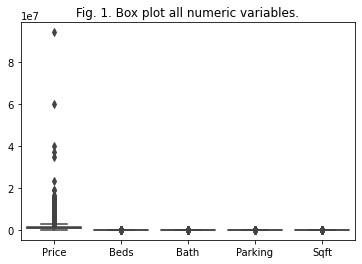

In [122]:
sns.boxplot(data=Ontario_City, palette="husl")
plt.rcParams['figure.figsize']=(10,5)
plt.title('Fig. 1. Box plot all numeric variables.')
plt.show()

### From the above plot its very evident that we have lots of outliers.

# Outlier Detection and Outlier Treatment

## Column: PRICE

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


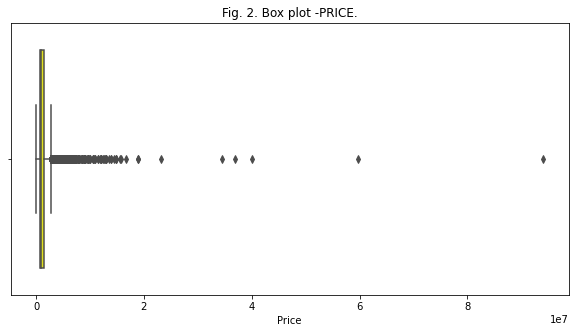

In [123]:
sns.boxplot( Ontario_City['Price'],color='yellow' )
plt.rcParams['figure.figsize']=(10,5)
plt.title('Fig. 2. Box plot -PRICE.')
plt.show()

### From the above figure, there are lots of outliers in the column Price


### Percentage of outliers

In [124]:
Q1 = Ontario_City['Price'].quantile(0.25)
Q3 = Ontario_City['Price'].quantile(0.75)
IQR = Q3 - Q1


In [125]:
Ontario_City[['Price']][((Ontario_City['Price']<(Q1-1.5*IQR)) | (Ontario_City['Price']>(Q3+1.5*IQR)))]

Price
2       4888000
14      2999900
66      3498500
71      5299000
75      2999900
...         ...
11493   3400000
11507   5138000
11508   5500000
11510  94092056
11512   7988000

[946 rows x 1 columns]

In [126]:
outliers = Ontario_City[['Price']][((Ontario_City['Price']<(Q1-1.5*IQR)) | (Ontario_City['Price']>(Q3+1.5*IQR)))]

In [127]:
outliers.head()

Price
2   4888000
14  2999900
66  3498500
71  5299000
75  2999900

### Trimming the above  outliers

In [128]:
trim_prop = Ontario_City[((Ontario_City['Price']>(Q1-1.5*IQR)) & (Ontario_City['Price']<(Q3+1.5*IQR)))]

In [129]:
trim_prop.shape

(10567, 8)

## Column: SQFT

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


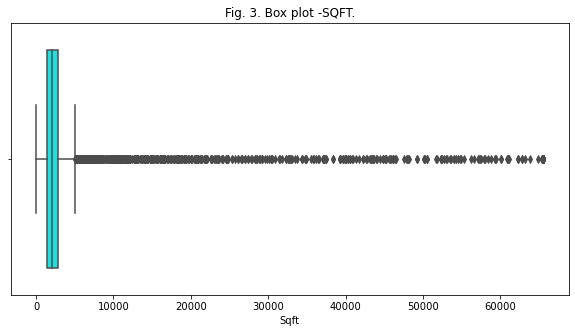

In [130]:
plt.rcParams['figure.figsize']=(10,5)
sns.boxplot( trim_prop['Sqft'],color='cyan' )
plt.title('Fig. 3. Box plot -SQFT.')
plt.show()

In [131]:
trim_prop.shape

(10567, 8)

### Trimming the above outliers

In [132]:
Q1 = trim_prop['Sqft'].quantile(0.25)
Q3 = trim_prop['Sqft'].quantile(0.75)
IQR = Q3 - Q1
IQR


1426.0

In [133]:
trim_prop[((trim_prop['Sqft']<(Q1-1.5*IQR)) | (trim_prop['Sqft']>(Q3+1.5*IQR)))]

Price  Beds  Bath  Parking   Sqft                City State  \
79      599000     2     2       12  35544  PeterboroughCounty    ON   
87     1259000     4     4       11  10018              Barrie    ON   
92      119900     2     2        0  10018  ThunderBayDistrict    ON   
93       87900     3     1        0  10018  ThunderBayDistrict    ON   
96      849000     3     4        6   9104       NorfolkCounty    ON   
...        ...   ...   ...      ...    ...                 ...   ...   
11444   384900     2     1        5  49222             Toronto    ON   
11461  2375000     4     3       16  65535             Toronto    ON   
11469   449000     2     1        3  42688             Toronto    ON   
11494  1679900     3     3        8  32670           Thornhill    ON   
11498   479900     3     1        6   9670           Etobicoke    ON   

      Postal_Code  
79         L0A1C0  
87         L4N7Y3  
92         P0T2W0  
93         P0T2S0  
96         N4B3B3  
...           ...  
11444      M6C3M9  
11461      M4E1K2  
11469      M6J1L2  
11494      L3T4W2  
11498      M8Y1S2  

[939 rows x 8 columns]

In [134]:
pro_data = trim_prop[((trim_prop['Sqft']>(Q1-1.5*IQR)) & (trim_prop['Sqft']<(Q3+1.5*IQR)))]

In [135]:
#trim_prop[((trim_prop['Sqft']>(Q1-1.5*IQR)) & (trim_prop['Sqft']<(Q3+1.5*IQR)))].shape

In [136]:
pro_data.shape

(9628, 8)

## Column BEDS

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


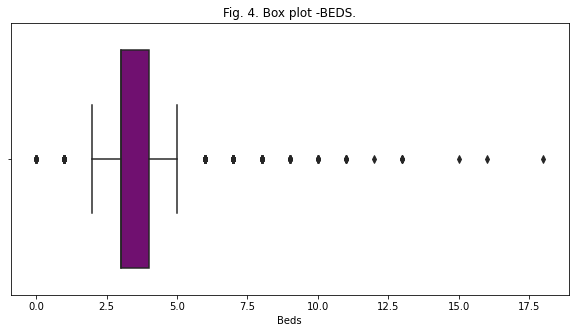

In [137]:
plt.rcParams['figure.figsize']=(10,5)
sns.boxplot( pro_data['Beds'],color='purple' )
plt.title('Fig. 4. Box plot -BEDS.')
plt.show()

In [163]:
Q1 = pro_data['Beds'].quantile(0.25)
Q3 = pro_data['Beds'].quantile(0.75)
IQR = Q3 - Q1
IQR

1.0

In [139]:
prop_data = pro_data[((pro_data['Beds']>(Q1-1.5*IQR)) & (pro_data['Beds']<(Q3+1.5*IQR)))]

In [140]:
prop_data

Price  Beds  Bath  Parking  Sqft           City State Postal_Code
0       769000     3     1        6  1100  NorfolkCounty    ON      N0A1N4
1       669900     3     2        5  1500  NiagaraRegion    ON      L2E6L4
3       689999     3     2        3  1500   DurhamRegion    ON      L1T1X5
4       999000     3     4        4  2000     PeelRegion    ON      L5N7L2
5       650000     3     2        8  1500   SimcoeCounty    ON      L4N7Y3
...        ...   ...   ...      ...   ...            ...   ...         ...
11504   748800     3     2        6   970      Thornhill    ON      L4J1J2
11505   899900     4     2        6  2252       Hamilton    ON      L8T2B1
11506  2050000     5     3        0  3038    Scarborough    ON      M4E3S1
11509   689900     2     1        4  1104        Toronto    ON      M5T2M4
11511   439990     2     1        4  1100        Toronto    ON      M4L1P7

[9254 rows x 8 columns]

In [141]:
prop_data.head()

Price  Beds  Bath  Parking  Sqft           City State Postal_Code
0  769000     3     1        6  1100  NorfolkCounty    ON      N0A1N4
1  669900     3     2        5  1500  NiagaraRegion    ON      L2E6L4
3  689999     3     2        3  1500   DurhamRegion    ON      L1T1X5
4  999000     3     4        4  2000     PeelRegion    ON      L5N7L2
5  650000     3     2        8  1500   SimcoeCounty    ON      L4N7Y3

# Column: Baths

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


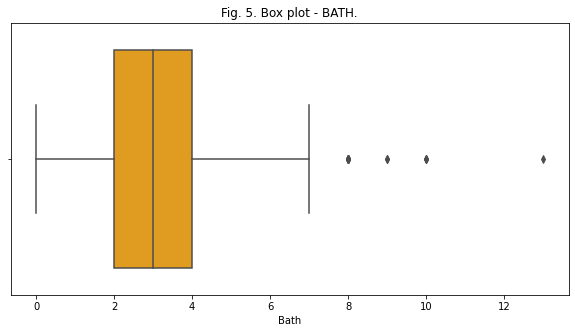

In [142]:
plt.rcParams['figure.figsize']=(10,5)
sns.boxplot( pro_data['Bath'],color='orange' )
plt.title('Fig. 5. Box plot - BATH.')
plt.show()

## Trimming

In [143]:
Q1 = prop_data['Bath'].quantile(0.25)
Q3 = prop_data['Bath'].quantile(0.75)
IQR = Q3 - Q1

In [144]:
prop1_data = prop_data[((prop_data['Bath']>(Q1-1.5*IQR)) & (prop_data['Bath']<(Q3+1.5*IQR)))]

In [145]:
prop1_data.shape

(8729, 8)

# Column: PARKING

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


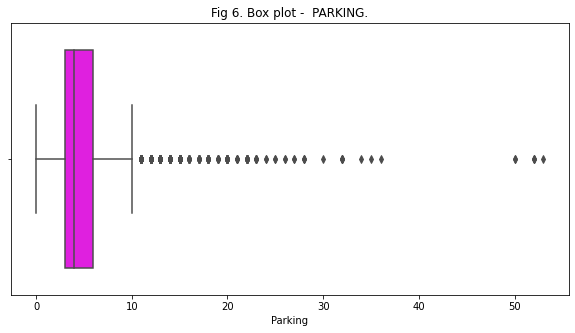

In [146]:
plt.rcParams['figure.figsize']=(10,5)
sns.boxplot( prop1_data['Parking'],color='magenta' )
plt.title('Fig 6. Box plot -  PARKING.')
plt.show()

## Trimming

In [168]:
Q1 = prop1_data['Parking'].quantile(0.25)
Q3 = prop1_data['Parking'].quantile(0.75)

IQR = Q3 - Q1
IQR

3.0

In [169]:
Q1


3.0

In [170]:
Q3

6.0

In [148]:
prop2_data = prop1_data[((prop1_data['Parking']>(Q1-1.5*IQR)) & (prop1_data['Parking']<(Q3+1.5*IQR)))]

In [149]:
prop2_data.shape

(8258, 8)

# Visualisations of  Categorical and Numeric Variables

### Distribution plot for Price column

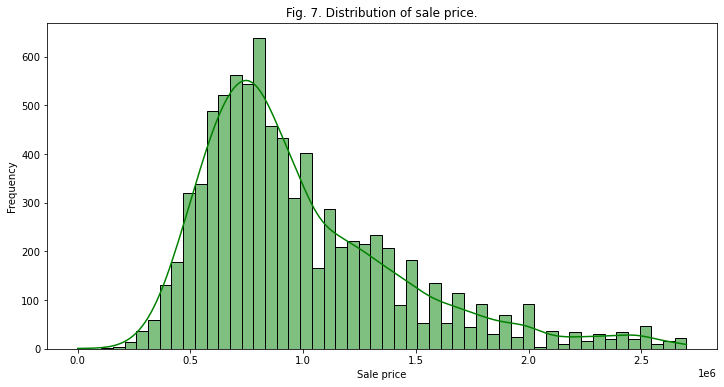

In [150]:
plt.rcParams['figure.figsize']=(10,5)
plt.figure(figsize=(12, 6))
plt.title('Fig. 7. Distribution of sale price.')
plt.xlabel('Sale price')
plt.ylabel('Frequency')
fig1 = sns.histplot(x=prop2_data.Price,color = 'green',kde=True,line_kws= {'color':'black'})
plt.show()

## Price V/s Sqft

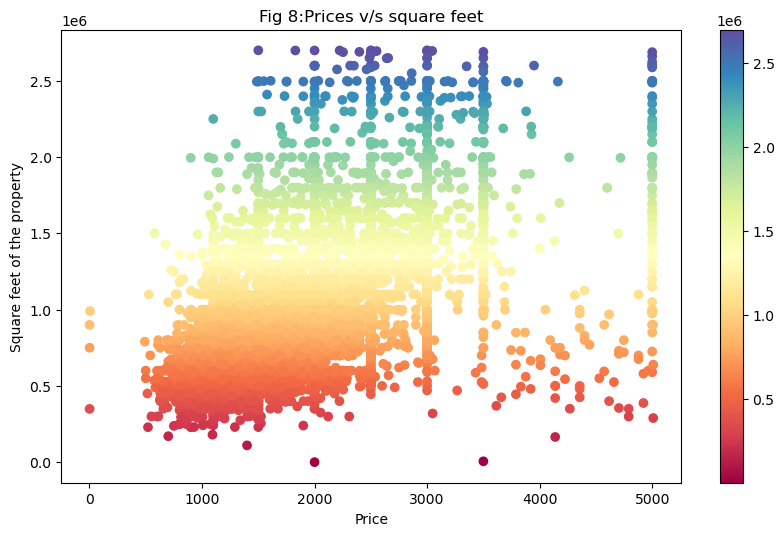

In [151]:
y = prop2_data['Price']
x = prop2_data['Sqft']
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.title('Fig 8:Prices v/s square feet')
plt.xlabel('Price')
plt.ylabel('Square feet of the property')
plt.show()

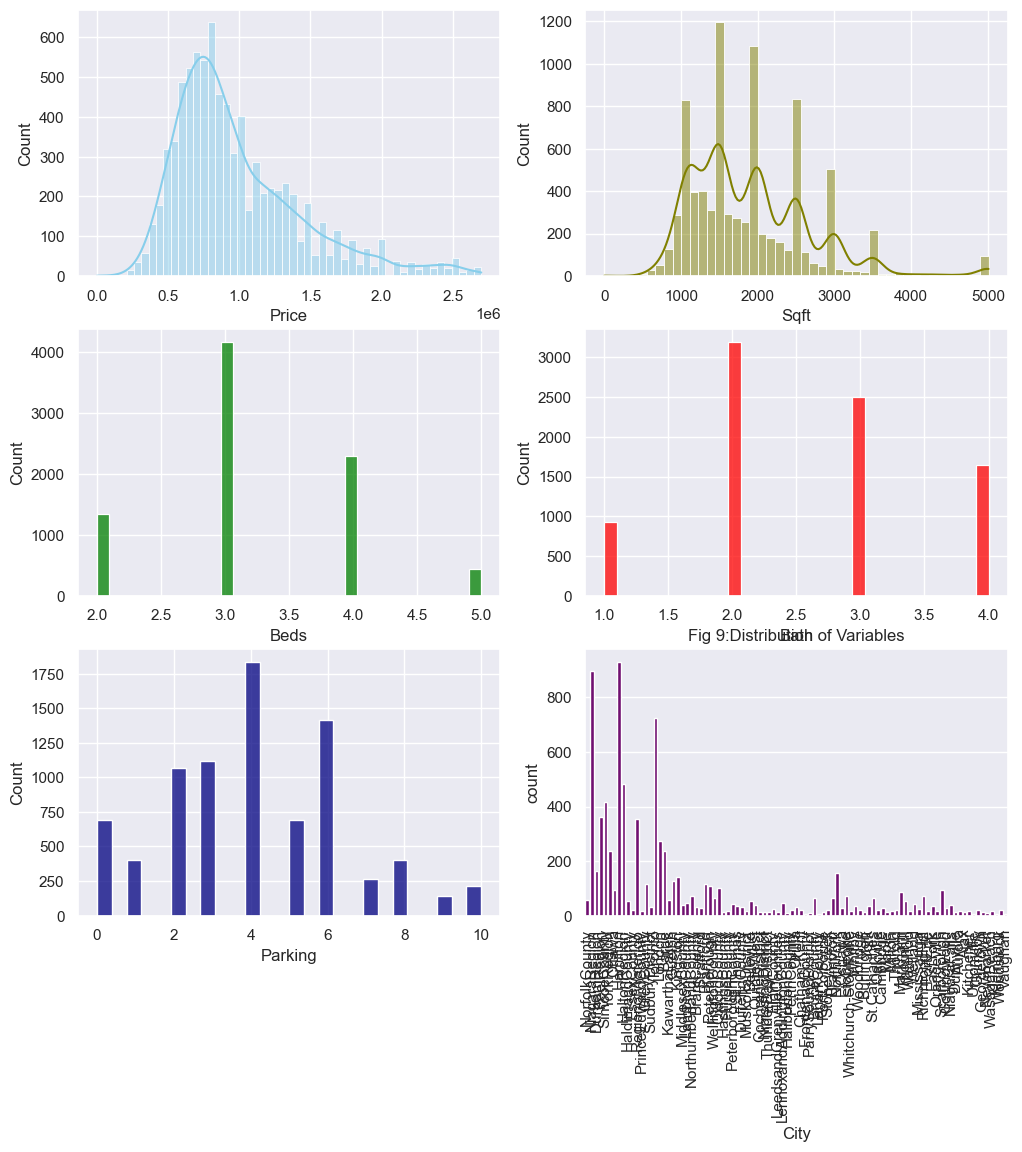

In [152]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(12, 12))
plt.title('Fig 9:Distribution of Variables')

plt.rcParams['figure.figsize']=(10,5)
sns.histplot(data=prop2_data, x="Price", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=prop2_data, x="Sqft", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=prop2_data, x="Beds",  color="green", ax=axs[1, 0])
sns.histplot(data=prop2_data, x="Bath",  color="red", ax=axs[1, 1])
sns.histplot(data=prop2_data, x="Parking", color="navy", ax=axs[2, 0])
a=sns.countplot(data=prop2_data, x="City", color="purple", ax=axs[2, 1])
a.tick_params(axis='x',rotation=90)

plt.show()

# Heat Map and Correlation pairplots

In [153]:
cols=['Price','Beds','Bath','Parking','Sqft']

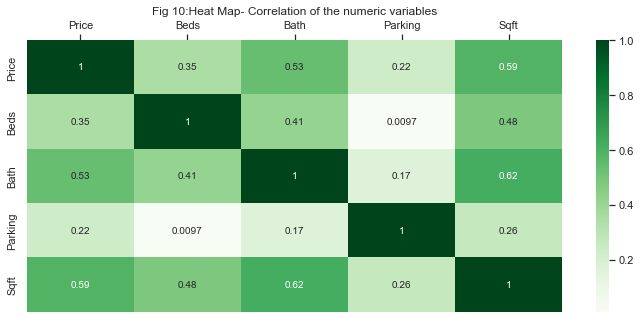

In [154]:

%matplotlib inline
fig = plt.figure(figsize=(12,5))
plt.title('Fig 10:Heat Map- Correlation of the numeric variables')
ax = sns.heatmap(prop2_data[cols].corr(),
cmap='Greens',annot=True)
ax.xaxis.tick_top() # move labels to the top

#sns.cubehelix_palette(20, light=0.95,dark=0.15)

# fig = plt.figure(figsize=(16,12))
# ax = fig.add_subplot(111)
# sns.heatmap(prop2_data.corr(),annot=True)
# plt.figure(figsize=(20,20))
# sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')



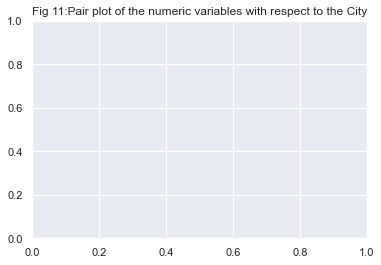

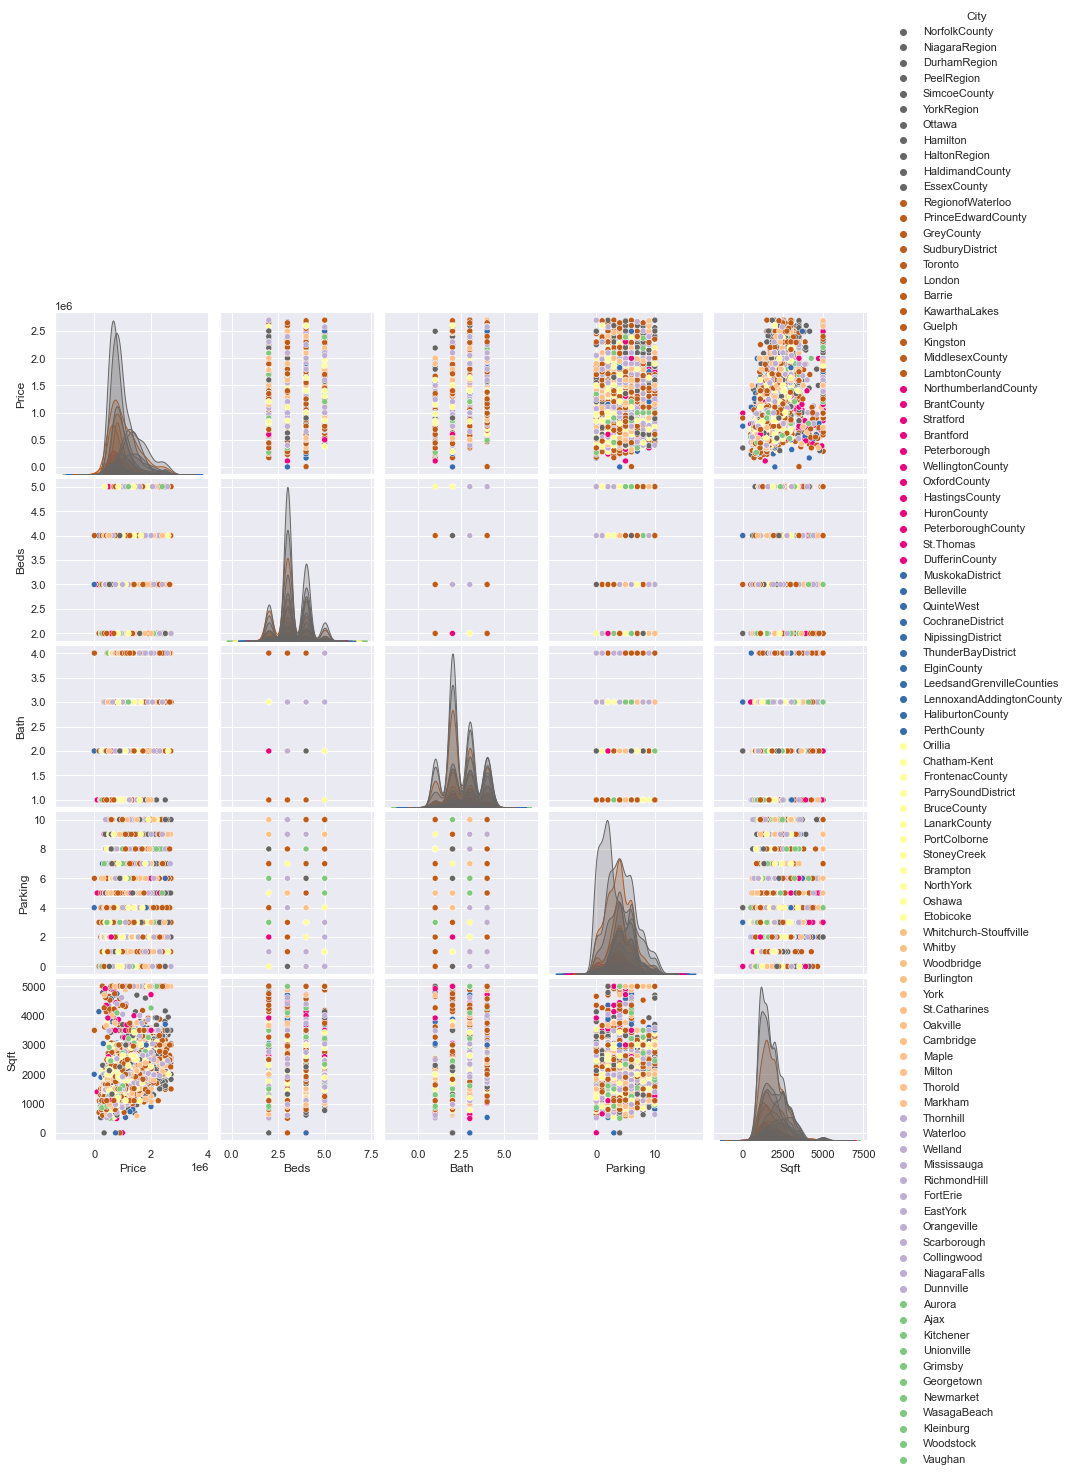

In [155]:
# sns.pairplot(trim_prop[cols],palette='gist_stern_r',
# plot_kws={'color': 'hls'}, diag_kws={'color': 'hls'})

plt.title('Fig 11:Pair plot of the numeric variables with respect to the City')
sns.pairplot(prop2_data, hue='City', palette='Accent_r')


#sns.pairplot(prop2_data, palette='gist_stern_r')

# sns.set_palette("dark")
# sns.color_palette("tab10")
# sns.palette='hls'
# sns.pairplot(prop2_data[cols], vars=prop2_data[cols])
# plt.show()

## Relation between Target Variable and remaining columns

<AxesSubplot:title={'center':'Fig 11:Count Plot of Variable City'}, xlabel='count', ylabel='City'>

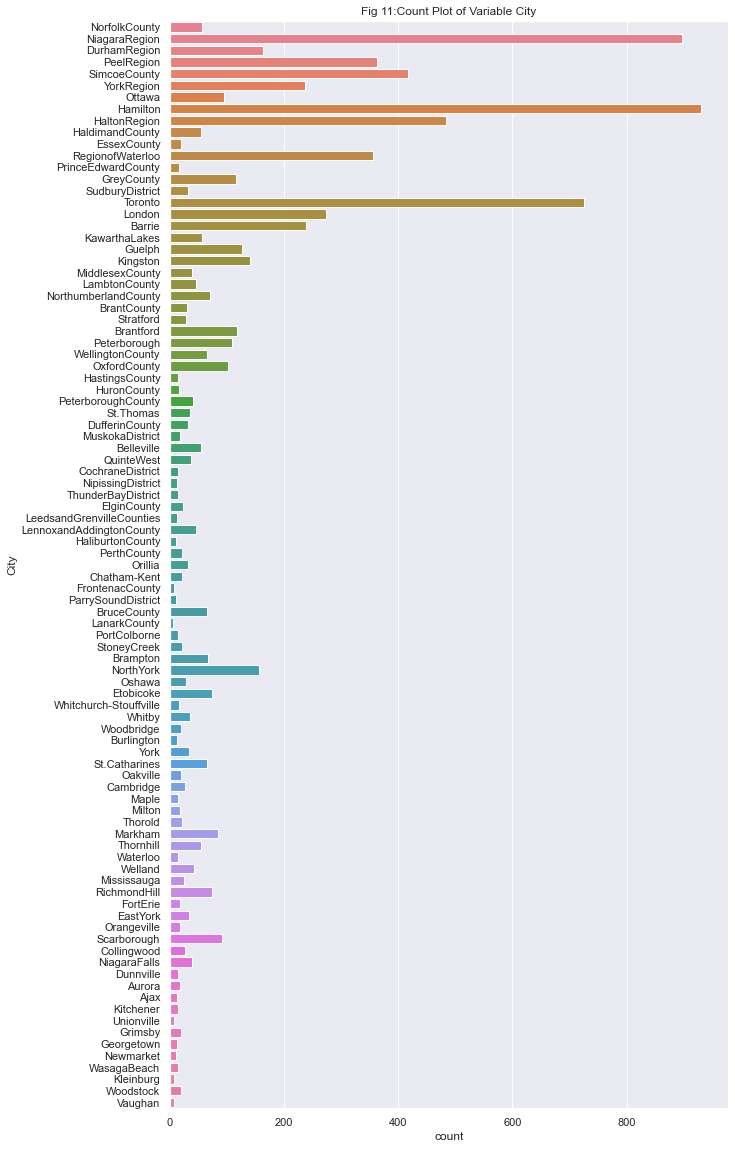

In [156]:
plt.rcParams['figure.figsize']=(10,20)
plt.title('Fig 11:Count Plot of Variable City')
sns.countplot(y="City", data=prop2_data, palette="husl")

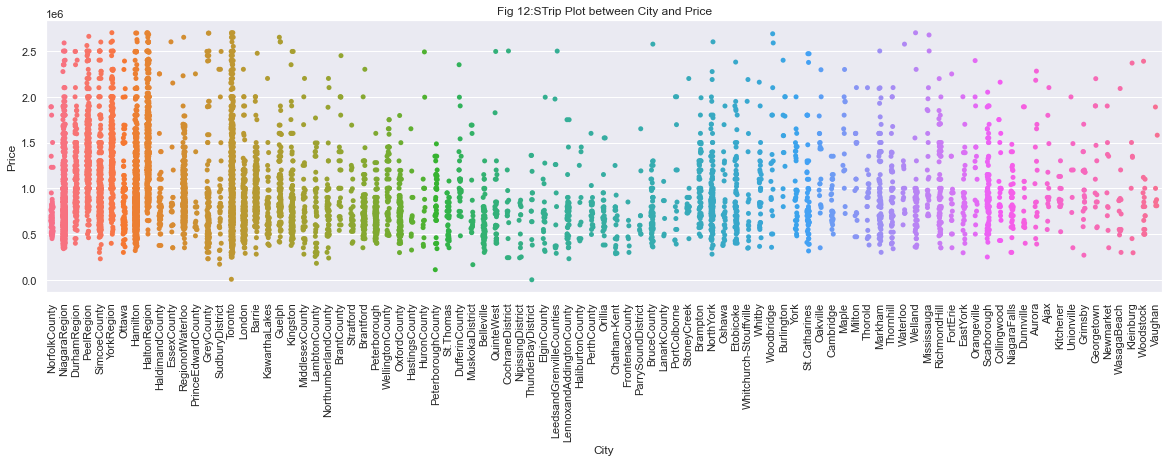

In [157]:
plt.rcParams['figure.figsize']=(20,5)
plt.title('Fig 12:STrip Plot between City and Price')
a=sns.stripplot(x="City", y="Price", data=prop2_data, palette="husl")
a.tick_params(axis='x',rotation=90)

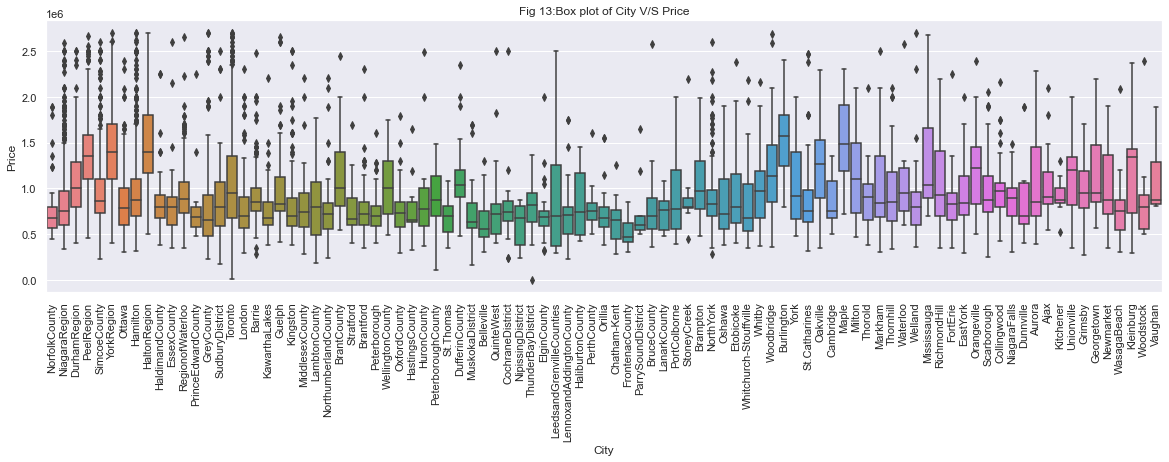

In [158]:
a=sns.boxplot(x="City", y="Price", data=prop2_data, palette="husl")
plt.title('Fig 13:Box plot of City V/S Price')
a.tick_params(axis='x',rotation=90)

In [159]:
import plotly.express as px

In [160]:
fig = px.scatter (prop2_data, x = "Price", y = "Sqft",  template = "plotly_dark",  trendline="lowess")

fig.show ()

In [161]:
fig = px.scatter (prop2_data, x = "Price", y = "Beds",  template = "plotly_dark",  trendline="ols")
fig.show ()

In [162]:
fig = px.scatter (prop2_data, x = "Price", y = "Bath", template = "plotly_dark",  trendline="ols")
fig.show ()

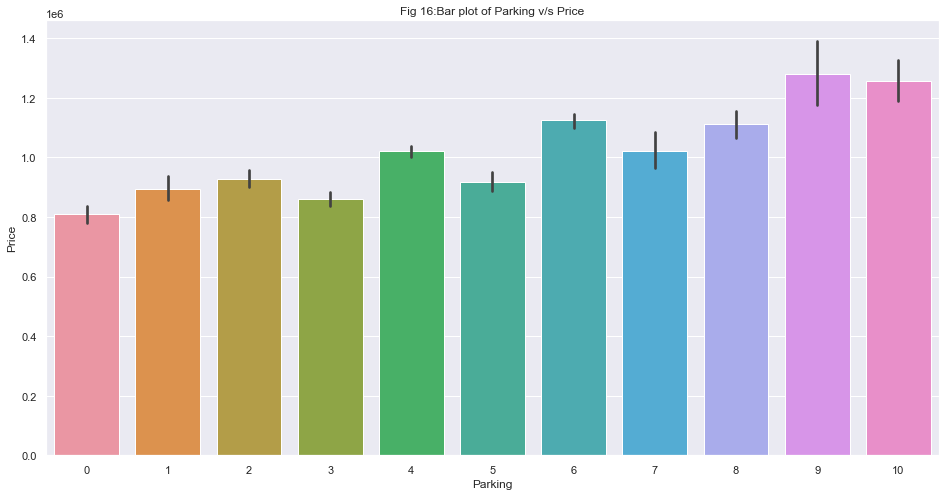

In [318]:
plt.figure(figsize=(16,8))
sns.barplot(x='Parking',y = 'Price',data=prop2_data)
plt.title('Fig 16:Bar plot of Parking v/s Price')
plt.show()

## We are going ahead with Price,Sqft,Beds,Baths,City and Parking

In [165]:
new_propdf=prop2_data[['Price','Sqft','Beds','Bath','Parking','City']]
# new_propdf=property_new[['Price','Sqft','Beds','Bath','Parking','State']]

In [166]:
new_propdf.columns=['Price','Sqft','Beds','Bath','Parking','City']

In [167]:
new_propdf.head(2)

Price  Sqft  Beds  Bath  Parking           City
0  769000  1100     3     1        6  NorfolkCounty
1  669900  1500     3     2        5  NiagaraRegion

In [168]:
new_propdf.shape

(8258, 6)

In [169]:
new_propdf.isnull().sum()

Price      0
Sqft       0
Beds       0
Bath       0
Parking    0
City       0
dtype: int64

# Onehot Encoding -- Column City

In [170]:
encod_data=pd.get_dummies(new_propdf['City'])

In [171]:
new_propdf.shape

(8258, 6)

In [172]:
encod_data

Ajax  Aurora  Barrie  Belleville  Brampton  BrantCounty  Brantford  \
0         0       0       0           0         0            0          0   
1         0       0       0           0         0            0          0   
3         0       0       0           0         0            0          0   
4         0       0       0           0         0            0          0   
5         0       0       0           0         0            0          0   
...     ...     ...     ...         ...       ...          ...        ...   
11504     0       0       0           0         0            0          0   
11505     0       0       0           0         0            0          0   
11506     0       0       0           0         0            0          0   
11509     0       0       0           0         0            0          0   
11511     0       0       0           0         0            0          0   

       BruceCounty  Burlington  Cambridge  ...  WasagaBeach  Waterloo  \
0                0           0          0  ...            0         0   
1                0           0          0  ...            0         0   
3                0           0          0  ...            0         0   
4                0           0          0  ...            0         0   
5                0           0          0  ...            0         0   
...            ...         ...        ...  ...          ...       ...   
11504            0           0          0  ...            0         0   
11505            0           0          0  ...            0         0   
11506            0           0          0  ...            0         0   
11509            0           0          0  ...            0         0   
11511            0           0          0  ...            0         0   

       Welland  WellingtonCounty  Whitby  Whitchurch-Stouffville  Woodbridge  \
0            0                 0       0                       0           0   
1            0                 0       0                       0           0   
3            0                 0       0                       0           0   
4            0                 0       0                       0           0   
5            0                 0       0                       0           0   
...        ...               ...     ...                     ...         ...   
11504        0                 0       0                       0           0   
11505        0                 0       0                       0           0   
11506        0                 0       0                       0           0   
11509        0                 0       0                       0           0   
11511        0                 0       0                       0           0   

       Woodstock  York  YorkRegion  
0              0     0           0  
1              0     0           0  
3              0     0           0  
4              0     0           0  
5              0     0           0  
...          ...   ...         ...  
11504          0     0           0  
11505          0     0           0  
11506          0     0           0  
11509          0     0           0  
11511          0     0           0  

[8258 rows x 93 columns]

In [173]:
encoder_df = pd.concat([new_propdf,encod_data],axis=1)

In [174]:
encoder_df

Price  Sqft  Beds  Bath  Parking           City  Ajax  Aurora  \
0       769000  1100     3     1        6  NorfolkCounty     0       0   
1       669900  1500     3     2        5  NiagaraRegion     0       0   
3       689999  1500     3     2        3   DurhamRegion     0       0   
4       999000  2000     3     4        4     PeelRegion     0       0   
5       650000  1500     3     2        8   SimcoeCounty     0       0   
...        ...   ...   ...   ...      ...            ...   ...     ...   
11504   748800   970     3     2        6      Thornhill     0       0   
11505   899900  2252     4     2        6       Hamilton     0       0   
11506  2050000  3038     5     3        0    Scarborough     0       0   
11509   689900  1104     2     1        4        Toronto     0       0   
11511   439990  1100     2     1        4        Toronto     0       0   

       Barrie  Belleville  ...  WasagaBeach  Waterloo  Welland  \
0           0           0  ...            0         0        0   
1           0           0  ...            0         0        0   
3           0           0  ...            0         0        0   
4           0           0  ...            0         0        0   
5           0           0  ...            0         0        0   
...       ...         ...  ...          ...       ...      ...   
11504       0           0  ...            0         0        0   
11505       0           0  ...            0         0        0   
11506       0           0  ...            0         0        0   
11509       0           0  ...            0         0        0   
11511       0           0  ...            0         0        0   

       WellingtonCounty  Whitby  Whitchurch-Stouffville  Woodbridge  \
0                     0       0                       0           0   
1                     0       0                       0           0   
3                     0       0                       0           0   
4                     0       0                       0           0   
5                     0       0                       0           0   
...                 ...     ...                     ...         ...   
11504                 0       0                       0           0   
11505                 0       0                       0           0   
11506                 0       0                       0           0   
11509                 0       0                       0           0   
11511                 0       0                       0           0   

       Woodstock  York  YorkRegion  
0              0     0           0  
1              0     0           0  
3              0     0           0  
4              0     0           0  
5              0     0           0  
...          ...   ...         ...  
11504          0     0           0  
11505          0     0           0  
11506          0     0           0  
11509          0     0           0  
11511          0     0           0  

[8258 rows x 99 columns]

In [175]:
encoder_df=encoder_df.reset_index()

In [176]:
encoder_df

index    Price  Sqft  Beds  Bath  Parking           City  Ajax  Aurora  \
0         0   769000  1100     3     1        6  NorfolkCounty     0       0   
1         1   669900  1500     3     2        5  NiagaraRegion     0       0   
2         3   689999  1500     3     2        3   DurhamRegion     0       0   
3         4   999000  2000     3     4        4     PeelRegion     0       0   
4         5   650000  1500     3     2        8   SimcoeCounty     0       0   
...     ...      ...   ...   ...   ...      ...            ...   ...     ...   
8253  11504   748800   970     3     2        6      Thornhill     0       0   
8254  11505   899900  2252     4     2        6       Hamilton     0       0   
8255  11506  2050000  3038     5     3        0    Scarborough     0       0   
8256  11509   689900  1104     2     1        4        Toronto     0       0   
8257  11511   439990  1100     2     1        4        Toronto     0       0   

      Barrie  ...  WasagaBeach  Waterloo  Welland  WellingtonCounty  Whitby  \
0          0  ...            0         0        0                 0       0   
1          0  ...            0         0        0                 0       0   
2          0  ...            0         0        0                 0       0   
3          0  ...            0         0        0                 0       0   
4          0  ...            0         0        0                 0       0   
...      ...  ...          ...       ...      ...               ...     ...   
8253       0  ...            0         0        0                 0       0   
8254       0  ...            0         0        0                 0       0   
8255       0  ...            0         0        0                 0       0   
8256       0  ...            0         0        0                 0       0   
8257       0  ...            0         0        0                 0       0   

      Whitchurch-Stouffville  Woodbridge  Woodstock  York  YorkRegion  
0                          0           0          0     0           0  
1                          0           0          0     0           0  
2                          0           0          0     0           0  
3                          0           0          0     0           0  
4                          0           0          0     0           0  
...                      ...         ...        ...   ...         ...  
8253                       0           0          0     0           0  
8254                       0           0          0     0           0  
8255                       0           0          0     0           0  
8256                       0           0          0     0           0  
8257                       0           0          0     0           0  

[8258 rows x 100 columns]

In [234]:
prop_final = encoder_df.drop(['index'],axis=1)

In [235]:
prop_final.head()

Price  Sqft  Beds  Bath  Parking           City  Ajax  Aurora  Barrie  \
0  769000  1100     3     1        6  NorfolkCounty     0       0       0   
1  669900  1500     3     2        5  NiagaraRegion     0       0       0   
2  689999  1500     3     2        3   DurhamRegion     0       0       0   
3  999000  2000     3     4        4     PeelRegion     0       0       0   
4  650000  1500     3     2        8   SimcoeCounty     0       0       0   

   Belleville  ...  WasagaBeach  Waterloo  Welland  WellingtonCounty  Whitby  \
0           0  ...            0         0        0                 0       0   
1           0  ...            0         0        0                 0       0   
2           0  ...            0         0        0                 0       0   
3           0  ...            0         0        0                 0       0   
4           0  ...            0         0        0                 0       0   

   Whitchurch-Stouffville  Woodbridge  Woodstock  York  YorkRegion  
0                       0           0          0     0           0  
1                       0           0          0     0           0  
2                       0           0          0     0           0  
3                       0           0          0     0           0  
4                       0           0          0     0           0  

[5 rows x 99 columns]

In [236]:
prop_final.drop('City', axis=1, inplace=True)

In [237]:
prop_final.head()

Price  Sqft  Beds  Bath  Parking  Ajax  Aurora  Barrie  Belleville  \
0  769000  1100     3     1        6     0       0       0           0   
1  669900  1500     3     2        5     0       0       0           0   
2  689999  1500     3     2        3     0       0       0           0   
3  999000  2000     3     4        4     0       0       0           0   
4  650000  1500     3     2        8     0       0       0           0   

   Brampton  ...  WasagaBeach  Waterloo  Welland  WellingtonCounty  Whitby  \
0         0  ...            0         0        0                 0       0   
1         0  ...            0         0        0                 0       0   
2         0  ...            0         0        0                 0       0   
3         0  ...            0         0        0                 0       0   
4         0  ...            0         0        0                 0       0   

   Whitchurch-Stouffville  Woodbridge  Woodstock  York  YorkRegion  
0                       0           0          0     0           0  
1                       0           0          0     0           0  
2                       0           0          0     0           0  
3                       0           0          0     0           0  
4                       0           0          0     0           0  

[5 rows x 98 columns]

In [238]:
# index1=prop_final[prop_final.iloc[:][5].isnull()].index
# prop_final=prop_final.drop(index=index1)

In [239]:
prop_final.shape

(8258, 98)

In [183]:
## Normalisation of variables
# prop_final.head()

Price  Sqft  Beds  Bath  Parking  Ajax  Aurora  Barrie  Belleville  \
0  769000  1100     3     1        6     0       0       0           0   
1  669900  1500     3     2        5     0       0       0           0   
2  689999  1500     3     2        3     0       0       0           0   
3  999000  2000     3     4        4     0       0       0           0   
4  650000  1500     3     2        8     0       0       0           0   

   Brampton  ...  WasagaBeach  Waterloo  Welland  WellingtonCounty  Whitby  \
0         0  ...            0         0        0                 0       0   
1         0  ...            0         0        0                 0       0   
2         0  ...            0         0        0                 0       0   
3         0  ...            0         0        0                 0       0   
4         0  ...            0         0        0                 0       0   

   Whitchurch-Stouffville  Woodbridge  Woodstock  York  YorkRegion  
0                       0           0          0     0           0  
1                       0           0          0     0           0  
2                       0           0          0     0           0  
3                       0           0          0     0           0  
4                       0           0          0     0           0  

[5 rows x 98 columns]

In [184]:
# num_data=prop_final[['Sqft','Beds','Bath','Parking']]

In [185]:
# from sklearn.preprocessing import MinMaxScaler

In [186]:
# num_data.head()

Sqft  Beds  Bath  Parking
0  1100     3     1        6
1  1500     3     2        5
2  1500     3     2        3
3  2000     3     4        4
4  1500     3     2        8

In [187]:
# scaler = MinMaxScaler()

In [188]:
# for col in prop_final.columns:
# #     print(col)
#     if col!='Price':
#         prop_final[col]=scaler.fit_transform(prop_final[[col]])

In [189]:
# prop_final.head()

Price      Sqft      Beds      Bath  Parking  Ajax  Aurora  Barrie  \
0  769000  0.219449  0.333333  0.000000      0.6   0.0     0.0     0.0   
1  669900  0.299321  0.333333  0.333333      0.5   0.0     0.0     0.0   
2  689999  0.299321  0.333333  0.333333      0.3   0.0     0.0     0.0   
3  999000  0.399161  0.333333  1.000000      0.4   0.0     0.0     0.0   
4  650000  0.299321  0.333333  0.333333      0.8   0.0     0.0     0.0   

   Belleville  Brampton  ...  WasagaBeach  Waterloo  Welland  \
0         0.0       0.0  ...          0.0       0.0      0.0   
1         0.0       0.0  ...          0.0       0.0      0.0   
2         0.0       0.0  ...          0.0       0.0      0.0   
3         0.0       0.0  ...          0.0       0.0      0.0   
4         0.0       0.0  ...          0.0       0.0      0.0   

   WellingtonCounty  Whitby  Whitchurch-Stouffville  Woodbridge  Woodstock  \
0               0.0     0.0                     0.0         0.0        0.0   
1               0.0     0.0                     0.0         0.0        0.0   
2               0.0     0.0                     0.0         0.0        0.0   
3               0.0     0.0                     0.0         0.0        0.0   
4               0.0     0.0                     0.0         0.0        0.0   

   York  YorkRegion  
0   0.0         0.0  
1   0.0         0.0  
2   0.0         0.0  
3   0.0         0.0  
4   0.0         0.0  

[5 rows x 98 columns]

## Standardisation

In [199]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [200]:
for col in prop_final.columns:
#     print(col)
    if col!='Price':
        prop_final[col]=scaler.fit_transform(prop_final[[col]])

# Random Forest Regressor---Model Creation

# Splitting the dependent and Independent Variables

In [201]:
X = prop_final.iloc[:,1:]
X.head()

Sqft      Beds      Bath   Parking      Ajax    Aurora    Barrie  \
0 -1.024653 -0.283385 -1.706904  0.807228 -0.039708 -0.045419 -0.172267   
1 -0.510186 -0.283385 -0.631314  0.385910 -0.039708 -0.045419 -0.172267   
2 -0.510186 -0.283385 -0.631314 -0.456725 -0.039708 -0.045419 -0.172267   
3  0.132898 -0.283385  1.519867 -0.035407 -0.039708 -0.045419 -0.172267   
4 -0.510186 -0.283385 -0.631314  1.649864 -0.039708 -0.045419 -0.172267   

   Belleville  Brampton  BrantCounty  ...  WasagaBeach  Waterloo   Welland  \
0   -0.081883 -0.089759    -0.060383  ...    -0.042658 -0.042658 -0.071498   
1   -0.081883 -0.089759    -0.060383  ...    -0.042658 -0.042658 -0.071498   
2   -0.081883 -0.089759    -0.060383  ...    -0.042658 -0.042658 -0.071498   
3   -0.081883 -0.089759    -0.060383  ...    -0.042658 -0.042658 -0.071498   
4   -0.081883 -0.089759    -0.060383  ...    -0.042658 -0.042658 -0.071498   

   WellingtonCounty    Whitby  Whitchurch-Stouffville  Woodbridge  Woodstock  \
0         -0.089071 -0.065241                -0.04406   -0.049272  -0.048022   
1         -0.089071 -0.065241                -0.04406   -0.049272  -0.048022   
2         -0.089071 -0.065241                -0.04406   -0.049272  -0.048022   
3         -0.089071 -0.065241                -0.04406   -0.049272  -0.048022   
4         -0.089071 -0.065241                -0.04406   -0.049272  -0.048022   

       York  YorkRegion  
0 -0.064298    -0.17152  
1 -0.064298    -0.17152  
2 -0.064298    -0.17152  
3 -0.064298    -0.17152  
4 -0.064298    -0.17152  

[5 rows x 97 columns]

In [202]:
y= prop_final['Price']

## Regularisation

In [203]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute
from numpy import mean
from numpy import std

In [204]:
model = Lasso(alpha=1.0)

In [205]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [206]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [207]:
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 223681.559 (8906.772)


## spliting the data into training and testing

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creation of random forest regression model

In [209]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

## Training of model using training data

In [210]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Feature importance

In [211]:
print(model.feature_importances_)

[5.18220869e-01 5.11395341e-02 6.29478872e-02 1.00195663e-01
 7.32850394e-04 5.85024196e-04 3.08737164e-03 1.02560922e-03
 8.11727579e-04 1.34991629e-03 3.07097187e-03 9.68823060e-04
 4.07788406e-03 3.36413075e-04 5.30937490e-04 8.53671239e-04
 9.97213910e-04 2.47738200e-03 4.30936663e-04 4.60296210e-03
 1.10034457e-03 1.12551547e-03 1.20357748e-03 2.83280593e-03
 2.04186806e-04 1.58724031e-04 2.99377957e-04 7.41341570e-03
 6.39024325e-04 4.43887612e-03 2.39467900e-03 5.86048941e-04
 6.09472126e-02 1.05074800e-02 4.80256698e-04 5.75999051e-04
 1.84449775e-03 4.65904092e-03 2.41024643e-04 4.83352430e-04
 1.28503775e-03 4.81903969e-04 8.48221698e-04 8.06914821e-04
 2.96065000e-03 1.56083099e-03 2.87267296e-03 1.63859987e-03
 7.49936338e-04 3.39835012e-03 5.62124567e-04 3.97300535e-04
 5.25580307e-04 9.29276551e-03 3.36862019e-04 1.63428114e-03
 5.13930409e-03 1.45843126e-03 3.87347602e-03 1.07151673e-03
 2.23548968e-04 3.98003768e-04 2.66661027e-03 3.21022140e-03
 7.08498788e-04 1.586651

## Scoring of the Model

In [212]:
print("Score of model using testing data:",model.score(X_test, y_test))

Score of model using testing data: 0.471081995725509


In [213]:
print("Score of model using training data:",model.score(X_train, y_train))

Score of model using training data: 0.8860137200411606


In [214]:
y_pred_rfg = model.predict(X_test)

In [259]:
r2_rgb=r2_score(y_test, y_pred_rfg)

In [218]:
mae_rfg = np.sqrt(mean_squared_error(y_test, y_pred_rfg))
print('Mean Square error for Random Forest Regressor:',mae_rfg)

Mean Square error for Random Forest Regressor: 325723.4125509145


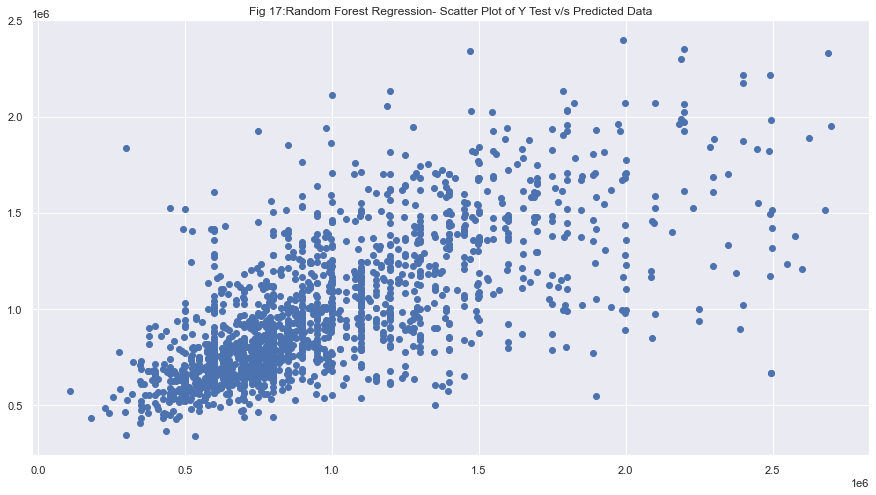

In [330]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred_rfg)
plt.title('Fig 17:Random Forest Regression- Scatter Plot of Y Test v/s Predicted Data')
plt.show()

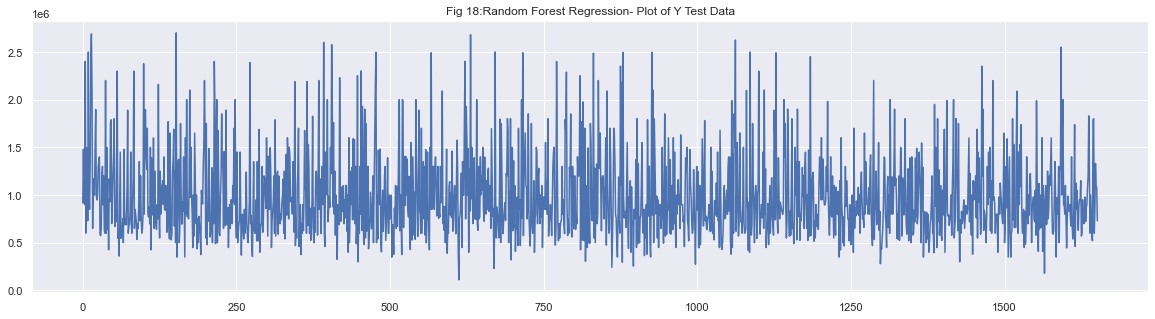

In [334]:
plt.title('Fig 18:Random Forest Regression- Plot of Y Test Data')
plt.plot(range(len(y_test)), y_test)

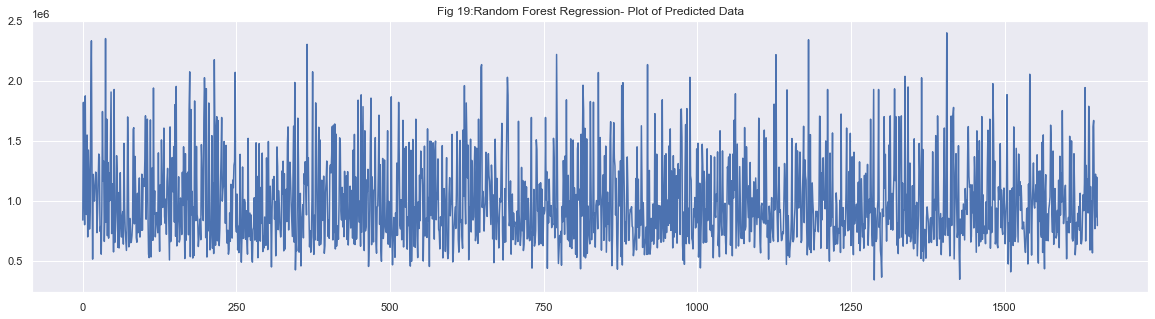

In [335]:
plt.title('Fig 19:Random Forest Regression- Plot of Predicted Data')
plt.plot(range(len(y_pred_rfg)), y_pred_rfg)

In [260]:
print('RF Regressor MAE:', metrics.mean_absolute_error(y_test, y_pred_rfg))
print('RF Regressor MSE:', metrics.mean_squared_error(y_test, y_pred_rfg))
print('RF Regressor RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg)))
print('RF Regressor R2:', r2_score(y_test, y_pred_rfg))

RF Regressor MAE: 223358.92275423615
RF Regressor MSE: 106095741483.81326
RF Regressor RMSE: 325723.4125509145
RF Regressor R2: 0.471081995725509


# XGBoost Regression Model

In [224]:
import xgboost as xgb

In [225]:

model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)



XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [226]:
y_pred_xbg = model_xgb.predict(X_test)

In [227]:
print("Score of model using testing data:",model.score(X_test, y_test))

Score of model using testing data: 0.471081995725509


In [228]:
print("Score of model using training data:",model.score(X_train, y_train))

Score of model using training data: 0.8860137200411606


In [229]:
mae_xbg= np.sqrt(mean_squared_error(y_test, y_pred_rfg))
print('Mean Square error for XGBoost Regressor:',mae_xbg)

Mean Square error for XGBoost Regressor: 325723.4125509145


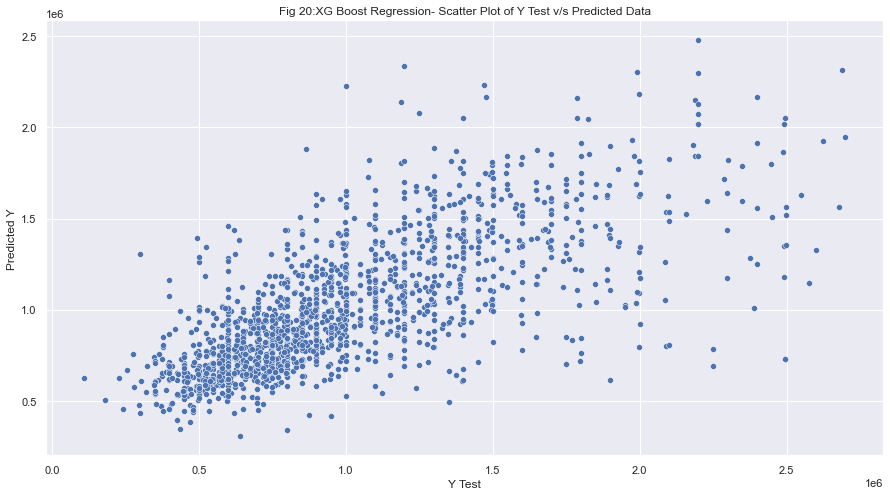

In [331]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=y_test,y=y_pred_xbg,palette='colorblind', legend='full')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Fig 20:XG Boost Regression- Scatter Plot of Y Test v/s Predicted Data')
#plt.scatter(x, y, c=y, cmap='viridis')
plt.show()

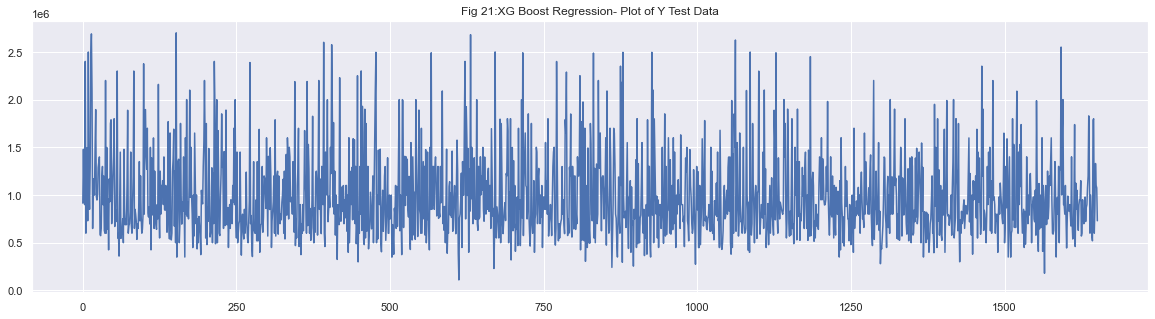

In [332]:
plt.title('Fig 21:XG Boost Regression- Plot of Y Test Data')
plt.plot(range(len(y_test)), y_test)

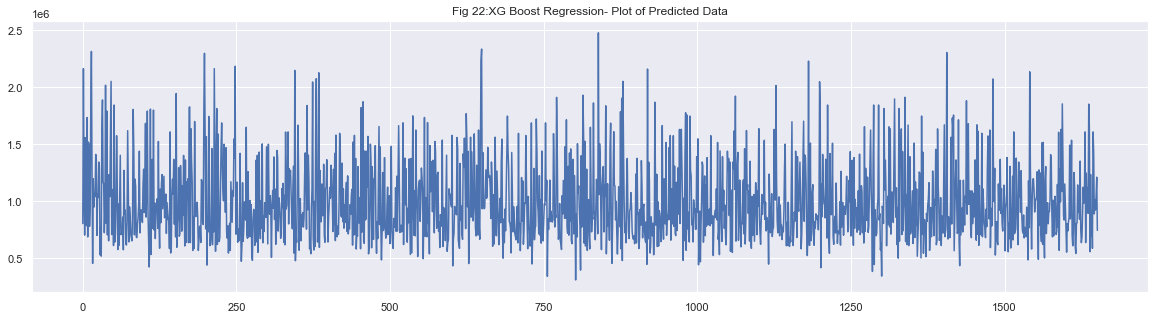

In [333]:
plt.title('Fig 22:XG Boost Regression- Plot of Predicted Data')
plt.plot(range(len(y_pred_xbg)), y_pred_xbg)

In [261]:
print('XGB Regressor MAE:', metrics.mean_absolute_error(y_test, y_pred_xbg))
print('XGB Regressor MSE:', metrics.mean_squared_error(y_test, y_pred_xbg))
print('XGB Regressor RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xbg)))
print('XGB Regressor R2:', r2_score(y_test, y_pred_xbg))

XGB Regressor MAE: 218994.47145505447
XGB Regressor MSE: 100407574558.81795
XGB Regressor RMSE: 316871.54267749883
XGB Regressor R2: 0.49943915554994645


# Saving the best model: XG Boost Model in pickle format

In [233]:
pickle.dump(model_xgb, open('model_xgb.pkl','wb'))

# Testing the model by loading the model again

In [244]:
my_model = pickle.load(open('model_xgb.pkl','rb'))


In [252]:
pred=[1100,3,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [253]:
data=pd.DataFrame(pred).T

In [254]:
data.head()

0   1   2   3   4   5   6   7   8   9   ...  87  88  89  90  91  92  93  \
0  1100   3   1   6   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   94  95  96  
0   0   0   0  

[1 rows x 97 columns]

In [256]:
data.values

array([[1100,    3,    1,    6,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

In [257]:
print(my_model.predict(data.values))

[1975864.9]
